# Prediction on Diabetes Patient's Hospital Readmission
By Mehar Chaudhry


Project Overview
Hospital readmissions, particularly within 30 days of discharge, are a significant concern in healthcare due to their implications on patient well-being and healthcare costs. In 2011, over $41 billion was spent on diabetic patients readmitted within 30 days in the U.S. Identifying factors that contribute to these readmissions can aid in developing predictive models to enhance patient care and reduce costs. ​

Objectives:

- Determine key predictors of 30-day hospital readmissions among diabetic
patients.

- Develop a predictive model using available patient data to identify individuals at higher risk of readmission.​

## Dataset: Diabetes 130-US Hospitals (1999–2008)

This dataset comprises over 100,000 records from diabetic patient encounters across 130 U.S. hospitals. Below is a summary of the key variables:

### Identifiers
- **encounter_id**: Unique identifier for each hospital encounter.
- **patient_nbr**: Unique identifier for each patient.

### Demographics
- **race**: Patient's race (e.g., Caucasian, African American, Asian, Hispanic, Other).
- **gender**: Patient's gender (Male, Female, Unknown/Invalid).
- **age**: Age group in 10-year intervals (e.g., [0–10), [10–20), ..., [90–100)).
- **weight**: Patient's weight in pounds (Note: Approximately 97% missing values).

### Hospitalization Details
- **admission_type_id**: Admission type (e.g., Emergency, Urgent, Elective).
- **discharge_disposition_id**: Discharge status (e.g., Discharged to home, Expired).
- **admission_source_id**: Source of admission (e.g., Physician referral, Emergency room).
- **time_in_hospital**: Length of stay in days.
- **payer_code**: Primary payer for the hospitalization (e.g., Medicare, Self-pay).
- **medical_specialty**: Specialty of the admitting physician (e.g., Cardiology, Internal Medicine).

### Clinical Measurements
- **num_lab_procedures**: Number of lab tests performed during the encounter.
- **num_procedures**: Number of procedures (excluding lab tests) performed.
- **num_medications**: Number of distinct medications administered.
- **number_outpatient**: Number of outpatient visits in the year preceding the encounter.
- **number_emergency**: Number of emergency visits in the year preceding the encounter.
- **number_inpatient**: Number of inpatient visits in the year preceding the encounter.

### Diagnoses
- **diag_1**: Primary diagnosis (ICD-9 code).
- **diag_2**: Secondary diagnosis (ICD-9 code).
- **diag_3**: Additional secondary diagnosis (ICD-9 code).
- **number_diagnoses**: Total number of diagnoses entered for the encounter.

### Lab Results
- **max_glu_serum**: Maximum glucose serum test result (e.g., >200, >300, Normal, None).
- **A1Cresult**: A1c test result (e.g., >7, >8, Normal, None).

### Medications
- **change**: Indicates if there was a change in diabetic medications (Change, No Change).
- **diabetesMed**: Indicates if any diabetic medication was prescribed (Yes, No).
- **medication features**: For each of the following medications, the dataset records whether the drug was prescribed and any dosage changes:
  - metformin
  - repaglinide
  - nateglinide
  - chlorpropamide
  - glimepiride
  - acetohexamide
  - glipizide
  - glyburide
  - tolbutamide
  - pioglitazone
  - rosiglitazone
  - acarbose
  - miglitol
  - troglitazone
  - tolazamide
  - examide
  - citoglipton
  - insulin
  - glyburide-metformin
  - glipizide-metformin
  - glimepiride-pioglitazone
  - metformin-rosiglitazone
  - metformin-pioglitazone

  Each medication feature indicates whether the drug was prescribed or if there was a change in dosage:
  - "No" – Not prescribed
  - "Steady" – No change in dosage
  - "Up" – Dosage increased
  - "Down" – Dosage decreased

### Readmission
- **readmitted**: Indicates if the patient was readmitted and when:
  - "<30" – Readmitted in less than 30 days
  - ">30" – Readmitted in more than 30 days
  - "NO" – Not readmitted


# Data Preparation & Exploration

In [ ]:
#Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("brandao/diabetes")

print("Path to dataset files:", path)

100%|██████████| 4.41M/4.41M [00:01<00:00, 4.32MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/brandao/diabetes/versions/1


In [ ]:
df = pd.read_csv(os.path.join(path,"diabetic_data.csv"))

# Display first few rows
print("Dataset Head:")
print(df.head())

# Display column names
print("\nColumns in Dataset:")
print(df.columns)

# Get summary statistics
print("\nDataset Summary:")
print(df.info())

#Displaying first 10 rows of data
df.head(10).T

Dataset Head:
   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No       

,0,1,2,3,4,5,6,7,8,9
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
weight,?,?,?,?,?,?,?,?,?,?
admission_type_id,6,1,1,1,1,2,3,1,2,3
discharge_disposition_id,25,1,1,1,1,1,1,1,1,3
admission_source_id,1,7,7,7,7,2,2,7,4,4
time_in_hospital,1,3,2,2,1,3,4,5,13,12


In [ ]:
#Checking shape of the dataset
df.shape

(101766, 50)

In [ ]:
#Checking data types of each variable
df.dtypes

,0
encounter_id,int64
patient_nbr,int64
race,object
gender,object
age,object
weight,object
admission_type_id,int64
discharge_disposition_id,int64
admission_source_id,int64
time_in_hospital,int64


In [ ]:
#Checking for missing values in dataset
#In the dataset missing values are represented by '?' sign
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [ ]:
# Gender was coded differently so we use a custom count for this one
print('gender', df['gender'][df['gender'] == 'Unknown/Invalid'].count())

gender 3


## Dealing with Missing Values

In this dataset, certain variables contain missing values to varying degrees. To ensure data quality and model performance, we applied the following strategies:

- **Dropped Variables with High Missingness**:  
  - `weight`: Approximately 98% missing values.
  - `payer_code` and `medical_specialty`: Each with about 40% missing values.

  These variables were excluded from the analysis due to the high proportion of missing data, which could introduce bias and reduce the reliability of the results.

- **Removed Records with Missing Values in Key Variables**:  
  - `race`, `diag_1`, `diag_2`, `diag_3`, and `gender`: These variables had a relatively small number of missing entries. We opted to remove records with missing values in these fields to maintain data integrity without significantly impacting the dataset size.


In [ ]:
#Dropping columns with large number of missing values
df = df.drop(['weight','payer_code','medical_specialty'], axis = 1)

In [ ]:
# Identify indices where all diagnosis fields are missing ('?')
drop_Idx = set(df[(df['diag_1'] == '?') & (df['diag_2'] == '?') & (df['diag_3'] == '?')].index)
# Add indices where any diagnosis field is missing
drop_Idx = drop_Idx.union(set(df['diag_1'][df['diag_1'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['diag_2'][df['diag_2'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['diag_3'][df['diag_3'] == '?'].index))
# Add indices with missing race information
drop_Idx = drop_Idx.union(set(df['race'][df['race'] == '?'].index))
# Add indices where discharge disposition indicates a specific category (e.g., 11)
drop_Idx = drop_Idx.union(set(df[df['discharge_disposition_id'] == 11].index))
# Add indices with unknown or invalid gender
drop_Idx = drop_Idx.union(set(df['gender'][df['gender'] == 'Unknown/Invalid'].index))

# Determine indices to retain
new_Idx = list(set(df.index) - set(drop_Idx))
# Filter the DataFrame to retain only valid rows

# Reset index before filtering with iloc
df = df.reset_index(drop=True)  # Reset the index
df = df.iloc[new_Idx]
# Reset index after filtering
df = df.reset_index(drop=True)  # Reset the index again


## Removal of Non-Informative Variables

Upon examining the dataset, we identified that the variables `citoglipton` and `examide` exhibit zero variance, as all records contain identical values for these features. Variables with zero variance lack the ability to provide interpretive or discriminatory information for predictive modeling. Therefore, to enhance the model's performance and reduce computational complexity, we decided to drop these two variables from our analysis.




In [ ]:
df = df.drop(['citoglipton', 'examide'], axis = 1)

In [ ]:
#Checking for missing values in the data
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

print('gender', df['gender'][df['gender'] == 'Unknown/Invalid'].count())

race 0
gender 0
age 0
diag_1 0
diag_2 0
diag_3 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0
gender 0


## Feature Engineering

## Feature Engineering

In this section, we introduce new features to enhance our predictive model:

### Service Utilization

To quantify a patient's engagement with healthcare services over the past year, we combined the counts of inpatient admissions, emergency room visits, and outpatient visits into a single metric named `service_utilization`. This aggregation provides a comprehensive view of healthcare usage, which may correlate with readmission likelihood.



In [ ]:
df['service_utilization'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']

### Number of Medication Changes

The dataset includes indicators for changes in 23 diabetes-related medications during the patient's hospital stay. We created a new feature, `num_med_changes`, representing the total number of these medications that were altered. This feature aims to capture the potential impact of medication adjustments on readmission rates, as prior research suggests a link between medication changes and patient outcomes.

In [ ]:
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']
for col in keys:
    colname = str(col) + 'temp'
    df[colname] = df[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
df['numchange'] = 0
for col in keys:
    colname = str(col) + 'temp'
    df['numchange'] = df['numchange'] + df[colname]
    del df[colname]

df['numchange'].value_counts()

,count
numchange,
0,70142
1,24922
2,1271
3,106
4,5


In [ ]:
# Re-encoding admission type, discharge type and admission source into fewer categories

# Simplify 'admission_type_id' categories:

#Eg- - Combine 'Urgent' (2) and 'Trauma' (7) into 'Emergency' (1)
df['admission_type_id'] = df['admission_type_id'].replace(2,1)
df['admission_type_id'] = df['admission_type_id'].replace(7,1)
df['admission_type_id'] = df['admission_type_id'].replace(6,5)
df['admission_type_id'] = df['admission_type_id'].replace(8,5)

# Consolidate 'discharge_disposition_id' categories:

# Eg- Combine 'Discharged to home with home health service' (6),

df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(6,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(8,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(9,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(13,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(3,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(4,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(5,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(14,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(22,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(23,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(24,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(12,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(15,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(16,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(17,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(25,18)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(26,18)

#Consolidate 'admission_source_id' categories:

# - Combine 'Clinic Referral' (2) and 'HMO Referral' (3) into 'Physician Referral' (1)

df['admission_source_id'] = df['admission_source_id'].replace(2,1)
df['admission_source_id'] = df['admission_source_id'].replace(3,1)
df['admission_source_id'] = df['admission_source_id'].replace(5,4)
df['admission_source_id'] = df['admission_source_id'].replace(6,4)
df['admission_source_id'] = df['admission_source_id'].replace(10,4)
df['admission_source_id'] = df['admission_source_id'].replace(22,4)
df['admission_source_id'] = df['admission_source_id'].replace(25,4)
df['admission_source_id'] = df['admission_source_id'].replace(15,9)
df['admission_source_id'] = df['admission_source_id'].replace(17,9)
df['admission_source_id'] = df['admission_source_id'].replace(20,9)
df['admission_source_id'] = df['admission_source_id'].replace(21,9)
df['admission_source_id'] = df['admission_source_id'].replace(13,11)
df['admission_source_id'] = df['admission_source_id'].replace(14,11)

## Encoding Categorical Variables

To prepare the dataset for modeling, we converted categorical variables such as `gender`, `race`, `medication change`, and the 23 individual drug features into numerical formats. For instance, the `medication change` feature was transformed from categorical values like "No" (no change) and "Ch" (changed) into binary values 0 and 1, respectively. This encoding facilitates the integration of these features into machine learning models that require numerical input.



In [ ]:
df['change'] = df['change'].replace('Ch', 1)
df['change'] = df['change'].replace('No', 0)
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)
df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
df['diabetesMed'] = df['diabetesMed'].replace('No', 0)
# keys is the same as before
for col in keys:
    df[col] = df[col].replace('No', 0)
    df[col] = df[col].replace('Steady', 1)
    df[col] = df[col].replace('Up', 1)
    df[col] = df[col].replace('Down', 1)

<ipython-input-16-f2f54d259688>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['change'] = df['change'].replace('No', 0)
<ipython-input-16-f2f54d259688>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace('Female', 0)
<ipython-input-16-f2f54d259688>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.

We also reduced both A1C test result and Glucose serum test result into categories of Normal, Abnormal and Not tested.


In [ ]:
df['A1Cresult'] = df['A1Cresult'].replace('>7', 1)
df['A1Cresult'] = df['A1Cresult'].replace('>8', 1)
df['A1Cresult'] = df['A1Cresult'].replace('Norm', 0)
df['A1Cresult'] = df['A1Cresult'].replace('None', -99)
df['max_glu_serum'] = df['max_glu_serum'].replace('>200', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('>300', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('Norm', 0)
df['max_glu_serum'] = df['max_glu_serum'].replace('None', -99)

<ipython-input-17-a93b7ed3ed2c>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['A1Cresult'] = df['A1Cresult'].replace('Norm', 0)
<ipython-input-17-a93b7ed3ed2c>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['max_glu_serum'] = df['max_glu_serum'].replace('Norm', 0)


## Handling Age Variable

The dataset provides patient ages in 10-year intervals (e.g., '20-30', '30-40') rather than exact values. To incorporate age as a numerical feature in our model, we assigned each age group its midpoint. For instance, the '20-30' category was represented as 25. This approach allows us to treat age as a continuous variable, facilitating the analysis of its relationship with readmission rates.


In [ ]:
# Code age intervals [0-10) - [90-100) from 1-10
for i in range(0,10):
    df['age'] = df['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i+1)
df['age'].value_counts()

<ipython-input-18-6b78ea761687>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['age'] = df['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i+1)


,count
age,
8,24815
7,21521
6,16546
9,16223
5,9208
4,3538
10,2594
3,1471
2,466


## Consolidating Multiple Encounters per Patient

In the dataset, some patients had multiple hospital encounters. Treating each encounter independently could bias the model towards patients with more frequent visits. To address this, we explored several methods to consolidate multiple encounters for the same patient:

- **Readmission Count**: Flagged patients with more than two readmissions across encounters as readmitted in the consolidated record.
- **Average Hospital Stay**: Calculated the average length of stay across all encounters.
- **Medication Change Percentage**: Determined the proportion of medication changes throughout the encounters.
- **Encounter Count**: Replaced the unique encounter ID with the total number of encounters per patient.
- **Diagnosis Combination**: Attempted to combine diagnoses from multiple encounters into a list.

However, combining categorical variables like diagnoses into arrays did not yield meaningful results for modeling. We also considered using either the first or last encounter as a representative record. The last encounters resulted in highly imbalanced data (96% readmissions vs. 4% non-readmissions). Therefore, we opted to use the first encounter for each patient, reducing the dataset to approximately 70,000 unique patient records.


In [ ]:
df2 = df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
df2.shape
(70442, 55)

(70442, 55)

In [ ]:
df.head().T

,0,1,2,3,4
encounter_id,149190,64410,500364,16680,35754
patient_nbr,55629189,86047875,82442376,42519267,82637451
race,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian
gender,0,0,1,1,1
age,2,3,4,5,6
admission_type_id,1,1,1,1,1
discharge_disposition_id,1,1,1,1,1
admission_source_id,7,7,7,7,1
time_in_hospital,3,2,2,1,3
num_lab_procedures,59,11,44,51,31


## Encoding the Outcome Variable

The dataset's `readmitted` column contains three categories:

- `<30`: Patient was readmitted within 30 days of discharge.
- `>30`: Patient was readmitted after more than 30 days.
- `NO`: Patient was not readmitted.

To simplify our analysis into a binary classification problem, we reclassified the outcome as follows:

- **1**: Readmitted within 30 days (`<30`).
- **0**: Not readmitted within 30 days (`>30` and `NO`).

This binary encoding allows us to focus on predicting early readmissions, which are often used as indicators of healthcare quality and have significant implications for patient outcomes and hospital resources.


In [ ]:
df['readmitted'].value_counts()

,count
readmitted,
NO,50731
>30,34649
<30,11066


In [ ]:
df['readmitted'] = df['readmitted'].replace('>30', 0)
df['readmitted'] = df['readmitted'].replace('<30', 1)
df['readmitted'] = df['readmitted'].replace('NO', 0)

<ipython-input-22-69ebdb50a4a9>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['readmitted'] = df['readmitted'].replace('NO', 0)


## Categorizing Diagnoses

The dataset includes up to three diagnosis codes per patient: primary (`diag_1`), secondary (`diag_2`), and additional (`diag_3`). Each of these codes corresponds to the International Classification of Diseases, Ninth Revision (ICD-9), resulting in a large number of unique codes (approximately 700–900 per diagnosis field). To simplify analysis and enhance interpretability, we grouped these codes into nine broader disease categories, following a methodology similar to that used in prior research on this dataset:

- **Circulatory**: ICD-9 codes 390–459
- **Respiratory**: ICD-9 codes 460–519
- **Digestive**: ICD-9 codes 520–579
- **Diabetes**: ICD-9 code 250
- **Injury**: ICD-9 codes 800–999
- **Musculoskeletal**: ICD-9 codes 710–739
- **Genitourinary**: ICD-9 codes 580–629
- **Neoplasms**: ICD-9 codes 140–239
- **Others**: All other codes not included in the above categories

Although we performed this categorization for all three diagnosis fields, we ultimately decided to use only the primary diagnosis (`diag_1`) in our model to maintain simplicity and reduce dimensionality. This approach allows us to capture the most significant health issue for each patient while keeping the model manageable.


In [ ]:
# Create new columns to store diagnosis levels (copying from original diagnosis columns)
df['level1_diag1'] = df['diag_1']
df['level2_diag1'] = df['diag_1']
df['level1_diag2'] = df['diag_2']
df['level2_diag2'] = df['diag_2']
df['level1_diag3'] = df['diag_3']
df['level2_diag3'] = df['diag_3']

In [ ]:
# Replace diagnosis codes starting with 'V' or 'E' with 0
df.loc[df['diag_1'].str.contains('V'), ['level1_diag1', 'level2_diag1']] = 0
df.loc[df['diag_1'].str.contains('E'), ['level1_diag1', 'level2_diag1']] = 0
df.loc[df['diag_2'].str.contains('V'), ['level1_diag2', 'level2_diag2']] = 0
df.loc[df['diag_2'].str.contains('E'), ['level1_diag2', 'level2_diag2']] = 0
df.loc[df['diag_3'].str.contains('V'), ['level1_diag3', 'level2_diag3']] = 0
df.loc[df['diag_3'].str.contains('E'), ['level1_diag3', 'level2_diag3']] = 0

# Replace unknown values '?' with -1
df['level1_diag1'] = df['level1_diag1'].replace('?', -1)
df['level2_diag1'] = df['level2_diag1'].replace('?', -1)
df['level1_diag2'] = df['level1_diag2'].replace('?', -1)
df['level2_diag2'] = df['level2_diag2'].replace('?', -1)
df['level1_diag3'] = df['level1_diag3'].replace('?', -1)
df['level2_diag3'] = df['level2_diag3'].replace('?', -1)

In [ ]:
# Convert all diagnosis columns to float for further processing
df['level1_diag1'] = df['level1_diag1'].astype(float)
df['level2_diag1'] = df['level2_diag1'].astype(float)
df['level1_diag2'] = df['level1_diag2'].astype(float)
df['level2_diag2'] = df['level2_diag2'].astype(float)
df['level1_diag3'] = df['level1_diag3'].astype(float)
df['level2_diag3'] = df['level2_diag3'].astype(float)

In [ ]:
# Categorize level 1 diagnosis codes into disease groups (diag1, diag2, diag3)
for index, row in df.iterrows():
    if (row['level1_diag1'] >= 390 and row['level1_diag1'] < 460) or (np.floor(row['level1_diag1']) == 785):
        df.loc[index, 'level1_diag1'] = 1
    elif (row['level1_diag1'] >= 460 and row['level1_diag1'] < 520) or (np.floor(row['level1_diag1']) == 786):
        df.loc[index, 'level1_diag1'] = 2
    elif (row['level1_diag1'] >= 520 and row['level1_diag1'] < 580) or (np.floor(row['level1_diag1']) == 787):
        df.loc[index, 'level1_diag1'] = 3
    elif (np.floor(row['level1_diag1']) == 250):
        df.loc[index, 'level1_diag1'] = 4
    elif (row['level1_diag1'] >= 800 and row['level1_diag1'] < 1000):
        df.loc[index, 'level1_diag1'] = 5
    elif (row['level1_diag1'] >= 710 and row['level1_diag1'] < 740):
        df.loc[index, 'level1_diag1'] = 6
    elif (row['level1_diag1'] >= 580 and row['level1_diag1'] < 630) or (np.floor(row['level1_diag1']) == 788):
        df.loc[index, 'level1_diag1'] = 7
    elif (row['level1_diag1'] >= 140 and row['level1_diag1'] < 240):
        df.loc[index, 'level1_diag1'] = 8
    else:
        df.loc[index, 'level1_diag1'] = 0

    if (row['level1_diag2'] >= 390 and row['level1_diag2'] < 460) or (np.floor(row['level1_diag2']) == 785):
        df.loc[index, 'level1_diag2'] = 1
    elif (row['level1_diag2'] >= 460 and row['level1_diag2'] < 520) or (np.floor(row['level1_diag2']) == 786):
        df.loc[index, 'level1_diag2'] = 2
    elif (row['level1_diag2'] >= 520 and row['level1_diag2'] < 580) or (np.floor(row['level1_diag2']) == 787):
        df.loc[index, 'level1_diag2'] = 3
    elif (np.floor(row['level1_diag2']) == 250):
        df.loc[index, 'level1_diag2'] = 4
    elif (row['level1_diag2'] >= 800 and row['level1_diag2'] < 1000):
        df.loc[index, 'level1_diag2'] = 5
    elif (row['level1_diag2'] >= 710 and row['level1_diag2'] < 740):
        df.loc[index, 'level1_diag2'] = 6
    elif (row['level1_diag2'] >= 580 and row['level1_diag2'] < 630) or (np.floor(row['level1_diag2']) == 788):
        df.loc[index, 'level1_diag2'] = 7
    elif (row['level1_diag2'] >= 140 and row['level1_diag2'] < 240):
        df.loc[index, 'level1_diag2'] = 8
    else:
        df.loc[index, 'level1_diag2'] = 0

    if (row['level1_diag3'] >= 390 and row['level1_diag3'] < 460) or (np.floor(row['level1_diag3']) == 785):
        df.loc[index, 'level1_diag3'] = 1
    elif (row['level1_diag3'] >= 460 and row['level1_diag3'] < 520) or (np.floor(row['level1_diag3']) == 786):
        df.loc[index, 'level1_diag3'] = 2
    elif (row['level1_diag3'] >= 520 and row['level1_diag3'] < 580) or (np.floor(row['level1_diag3']) == 787):
        df.loc[index, 'level1_diag3'] = 3
    elif (np.floor(row['level1_diag3']) == 250):
        df.loc[index, 'level1_diag3'] = 4
    elif (row['level1_diag3'] >= 800 and row['level1_diag3'] < 1000):
        df.loc[index, 'level1_diag3'] = 5
    elif (row['level1_diag3'] >= 710 and row['level1_diag3'] < 740):
        df.loc[index, 'level1_diag3'] = 6
    elif (row['level1_diag3'] >= 580 and row['level1_diag3'] < 630) or (np.floor(row['level1_diag3']) == 788):
        df.loc[index, 'level1_diag3'] = 7
    elif (row['level1_diag3'] >= 140 and row['level1_diag3'] < 240):
        df.loc[index, 'level1_diag3'] = 8
    else:
        df.loc[index, 'level1_diag3'] = 0


In [ ]:
# Categorize level 2 diagnosis codes into more specific groups (diag1, diag2, diag3)
for index, row in df.iterrows():
    if (row['level2_diag1'] >= 390 and row['level2_diag1'] < 399):
        df.loc[index, 'level2_diag1'] = 1
    elif (row['level2_diag1'] >= 401 and row['level2_diag1'] < 415):
        df.loc[index, 'level2_diag1'] = 2
    elif (row['level2_diag1'] >= 415 and row['level2_diag1'] < 460):
        df.loc[index, 'level2_diag1'] = 3
    elif (np.floor(row['level2_diag1']) == 785):
        df.loc[index, 'level2_diag1'] = 4
    elif (row['level2_diag1'] >= 460 and row['level2_diag1'] < 489):
        df.loc[index, 'level2_diag1'] = 5
    elif (row['level2_diag1'] >= 490 and row['level2_diag1'] < 497):
        df.loc[index, 'level2_diag1'] = 6
    elif (row['level2_diag1'] >= 500 and row['level2_diag1'] < 520):
        df.loc[index, 'level2_diag1'] = 7
    elif (np.floor(row['level2_diag1']) == 786):
        df.loc[index, 'level2_diag1'] = 8
    elif (row['level2_diag1'] >= 520 and row['level2_diag1'] < 530):
        df.loc[index, 'level2_diag1'] = 9
    elif (row['level2_diag1'] >= 530 and row['level2_diag1'] < 544):
        df.loc[index, 'level2_diag1'] = 10
    elif (row['level2_diag1'] >= 550 and row['level2_diag1'] < 554):
        df.loc[index, 'level2_diag1'] = 11
    elif (row['level2_diag1'] >= 555 and row['level2_diag1'] < 580):
        df.loc[index, 'level2_diag1'] = 12
    elif (np.floor(row['level2_diag1']) == 787):
        df.loc[index, 'level2_diag1'] = 13
    elif (np.floor(row['level2_diag1']) == 250):
        df.loc[index, 'level2_diag1'] = 14
    elif (row['level2_diag1'] >= 800 and row['level2_diag1'] < 1000):
        df.loc[index, 'level2_diag1'] = 15
    elif (row['level2_diag1'] >= 710 and row['level2_diag1'] < 740):
        df.loc[index, 'level2_diag1'] = 16
    elif (row['level2_diag1'] >= 580 and row['level2_diag1'] < 630):
        df.loc[index, 'level2_diag1'] = 17
    elif (np.floor(row['level2_diag1']) == 788):
        df.loc[index, 'level2_diag1'] = 18
    elif (row['level2_diag1'] >= 140 and row['level2_diag1'] < 240):
        df.loc[index, 'level2_diag1'] = 19
    elif row['level2_diag1'] >= 240 and row['level2_diag1'] < 280 and (np.floor(row['level2_diag1']) != 250):
        df.loc[index, 'level2_diag1'] = 20
    elif (row['level2_diag1'] >= 680 and row['level2_diag1'] < 710) or (np.floor(row['level2_diag1']) == 782):
        df.loc[index, 'level2_diag1'] = 21
    elif (row['level2_diag1'] >= 290 and row['level2_diag1'] < 320):
        df.loc[index, 'level2_diag1'] = 22
    else:
        df.loc[index, 'level2_diag1'] = 0

    if (row['level2_diag2'] >= 390 and row['level2_diag2'] < 399):
        df.loc[index, 'level2_diag2'] = 1
    elif (row['level2_diag2'] >= 401 and row['level2_diag2'] < 415):
        df.loc[index, 'level2_diag2'] = 2
    elif (row['level2_diag2'] >= 415 and row['level2_diag2'] < 460):
        df.loc[index, 'level2_diag2'] = 3
    elif (np.floor(row['level2_diag2']) == 785):
        df.loc[index, 'level2_diag2'] = 4
    elif (row['level2_diag2'] >= 460 and row['level2_diag2'] < 489):
        df.loc[index, 'level2_diag2'] = 5
    elif (row['level2_diag2'] >= 490 and row['level2_diag2'] < 497):
        df.loc[index, 'level2_diag2'] = 6
    elif (row['level2_diag2'] >= 500 and row['level2_diag2'] < 520):
        df.loc[index, 'level2_diag2'] = 7
    elif (np.floor(row['level2_diag2']) == 786):
        df.loc[index, 'level2_diag2'] = 8
    elif (row['level2_diag2'] >= 520 and row['level2_diag2'] < 530):
        df.loc[index, 'level2_diag2'] = 9
    elif (row['level2_diag2'] >= 530 and row['level2_diag2'] < 544):
        df.loc[index, 'level2_diag2'] = 10
    elif (row['level2_diag2'] >= 550 and row['level2_diag2'] < 554):
        df.loc[index, 'level2_diag2'] = 11
    elif (row['level2_diag2'] >= 555 and row['level2_diag2'] < 580):
        df.loc[index, 'level2_diag2'] = 12
    elif (np.floor(row['level2_diag2']) == 787):
        df.loc[index, 'level2_diag2'] = 13
    elif (np.floor(row['level2_diag2']) == 250):
        df.loc[index, 'level2_diag2'] = 14
    elif (row['level2_diag2'] >= 800 and row['level2_diag2'] < 1000):
        df.loc[index, 'level2_diag2'] = 15
    elif (row['level2_diag2'] >= 710 and row['level2_diag2'] < 740):
        df.loc[index, 'level2_diag2'] = 16
    elif (row['level2_diag2'] >= 580 and row['level2_diag2'] < 630):
        df.loc[index, 'level2_diag2'] = 17
    elif (np.floor(row['level2_diag2']) == 788):
        df.loc[index, 'level2_diag2'] = 18
    elif (row['level2_diag2'] >= 140 and row['level2_diag2'] < 240):
        df.loc[index, 'level2_diag2'] = 19
    elif row['level2_diag2'] >= 240 and row['level2_diag2'] < 280 and (np.floor(row['level2_diag2']) != 250):
        df.loc[index, 'level2_diag2'] = 20
    elif (row['level2_diag2'] >= 680 and row['level2_diag2'] < 710) or (np.floor(row['level2_diag2']) == 782):
        df.loc[index, 'level2_diag2'] = 21
    elif (row['level2_diag2'] >= 290 and row['level2_diag2'] < 320):
        df.loc[index, 'level2_diag2'] = 22
    else:
        df.loc[index, 'level2_diag2'] = 0


    if (row['level2_diag3'] >= 390 and row['level2_diag3'] < 399):
        df.loc[index, 'level2_diag3'] = 1
    elif (row['level2_diag3'] >= 401 and row['level2_diag3'] < 415):
        df.loc[index, 'level2_diag3'] = 2
    elif (row['level2_diag3'] >= 415 and row['level2_diag3'] < 460):
        df.loc[index, 'level2_diag3'] = 3
    elif (np.floor(row['level2_diag3']) == 785):
        df.loc[index, 'level2_diag3'] = 4
    elif (row['level2_diag3'] >= 460 and row['level2_diag3'] < 489):
        df.loc[index, 'level2_diag3'] = 5
    elif (row['level2_diag3'] >= 490 and row['level2_diag3'] < 497):
        df.loc[index, 'level2_diag3'] = 6
    elif (row['level2_diag3'] >= 500 and row['level2_diag3'] < 520):
        df.loc[index, 'level2_diag3'] = 7
    elif (np.floor(row['level2_diag3']) == 786):
        df.loc[index, 'level2_diag3'] = 8
    elif (row['level2_diag3'] >= 520 and row['level2_diag3'] < 530):
        df.loc[index, 'level2_diag3'] = 9
    elif (row['level2_diag3'] >= 530 and row['level2_diag3'] < 544):
        df.loc[index, 'level2_diag3'] = 10
    elif (row['level2_diag3'] >= 550 and row['level2_diag3'] < 554):
        df.loc[index, 'level2_diag3'] = 11
    elif (row['level2_diag3'] >= 555 and row['level2_diag3'] < 580):
        df.loc[index, 'level2_diag3'] = 12
    elif (np.floor(row['level2_diag3']) == 787):
        df.loc[index, 'level2_diag3'] = 13
    elif (np.floor(row['level2_diag3']) == 250):
        df.loc[index, 'level2_diag3'] = 14
    elif (row['level2_diag3'] >= 800 and row['level2_diag3'] < 1000):
        df.loc[index, 'level2_diag3'] = 15
    elif (row['level2_diag3'] >= 710 and row['level2_diag3'] < 740):
        df.loc[index, 'level2_diag3'] = 16
    elif (row['level2_diag3'] >= 580 and row['level2_diag3'] < 630):
        df.loc[index, 'level2_diag3'] = 17
    elif (np.floor(row['level2_diag3']) == 788):
        df.loc[index, 'level2_diag3'] = 18
    elif (row['level2_diag3'] >= 140 and row['level2_diag3'] < 240):
        df.loc[index, 'level2_diag3'] = 19
    elif row['level2_diag3'] >= 240 and row['level2_diag3'] < 280 and (np.floor(row['level2_diag3']) != 250):
        df.loc[index, 'level2_diag3'] = 20
    elif (row['level2_diag3'] >= 680 and row['level2_diag3'] < 710) or (np.floor(row['level2_diag3']) == 782):
        df.loc[index, 'level2_diag3'] = 21
    elif (row['level2_diag3'] >= 290 and row['level2_diag3'] < 320):
        df.loc[index, 'level2_diag3'] = 22
    else:
        df.loc[index, 'level2_diag3'] = 0

## Data Visualization

###  Distribution of Readmission

In our dataset, the target variable `Readmitted` is significantly imbalanced. The number of patients who were readmitted is substantially lower compared to those who were not readmitted. This imbalance can adversely affect the performance of machine learning models, as they may become biased towards the majority class (not readmitted), leading to poor predictive accuracy for the minority class (readmitted).



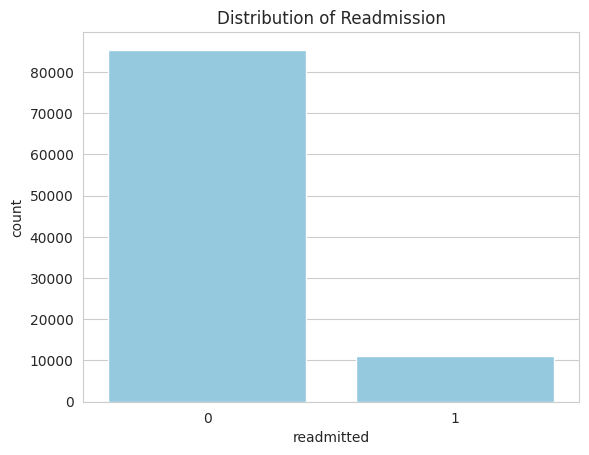

In [ ]:

sns.set_style("whitegrid")

sns.countplot(data=df, x='readmitted', color='skyblue')
plt.title('Distribution of Readmission')
plt.show()

#### Time in Hospital and Readmission


<ipython-input-37-acdf5bd82210>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['readmitted'] == 0, 'time_in_hospital'], color='skyblue', shade=True, label='Not Readmitted')
<ipython-input-37-acdf5bd82210>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['readmitted'] == 1, 'time_in_hospital'], color='salmon', shade=True, label='Readmitted')


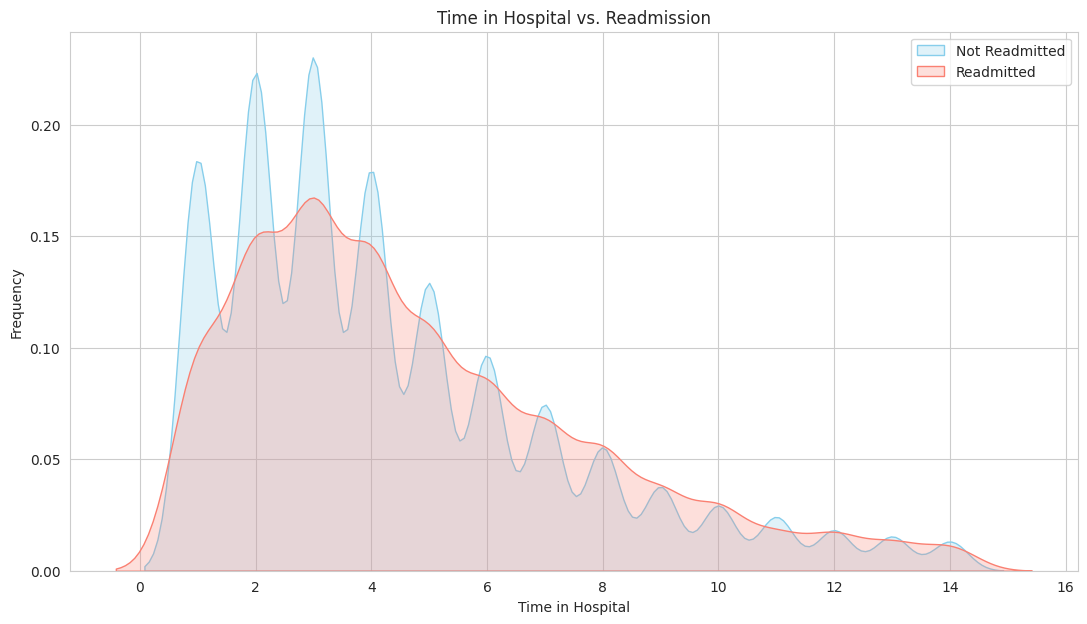

In [ ]:
plt.figure(figsize=(13, 7))
sns.kdeplot(df.loc[df['readmitted'] == 0, 'time_in_hospital'], color='skyblue', shade=True, label='Not Readmitted')
sns.kdeplot(df.loc[df['readmitted'] == 1, 'time_in_hospital'], color='salmon', shade=True, label='Readmitted')
plt.xlabel('Time in Hospital')
plt.ylabel('Frequency')
plt.title('Time in Hospital vs. Readmission')
plt.legend()
plt.show()



#### Age and Readmission

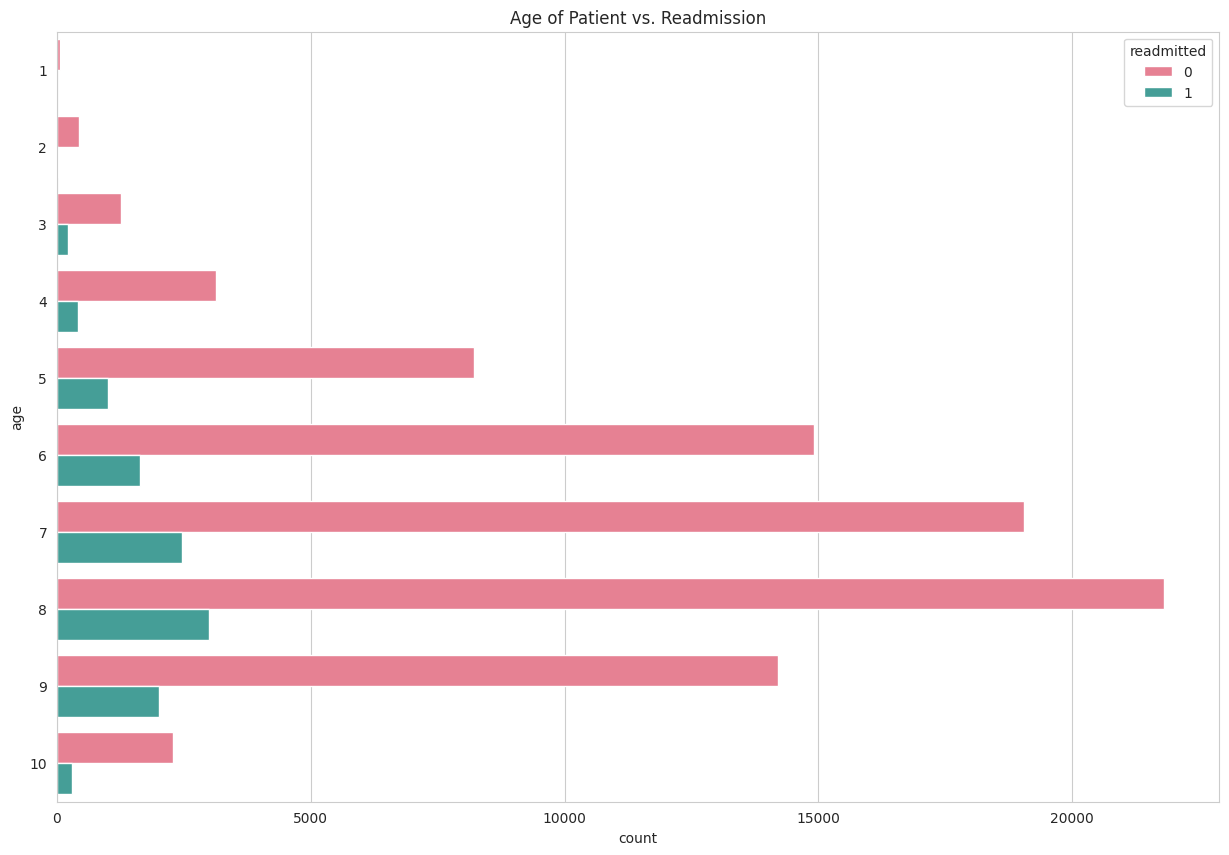

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(15, 10))

# Create the count plot with a custom palette
sns.countplot(y='age', hue='readmitted', data=df, palette='husl')
plt.title('Age of Patient vs. Readmission')
plt.show()


#### Ethnicity of patient and Readmission

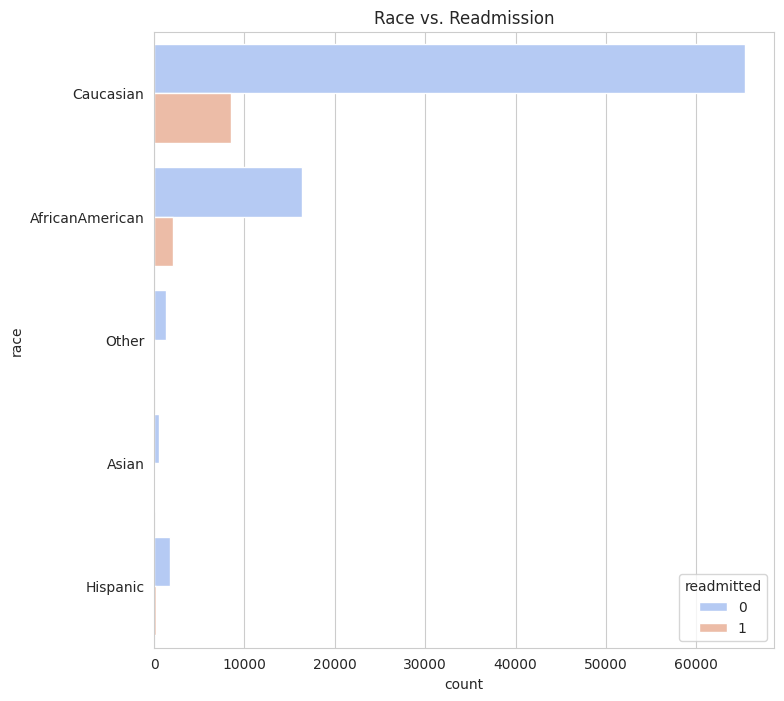

In [ ]:
# Set the figure size
plt.figure(figsize=(8, 8))

# Create the count plot with a custom palette
sns.countplot(y='race', hue='readmitted', data=df, palette='coolwarm')
plt.title('Race vs. Readmission')
plt.show()


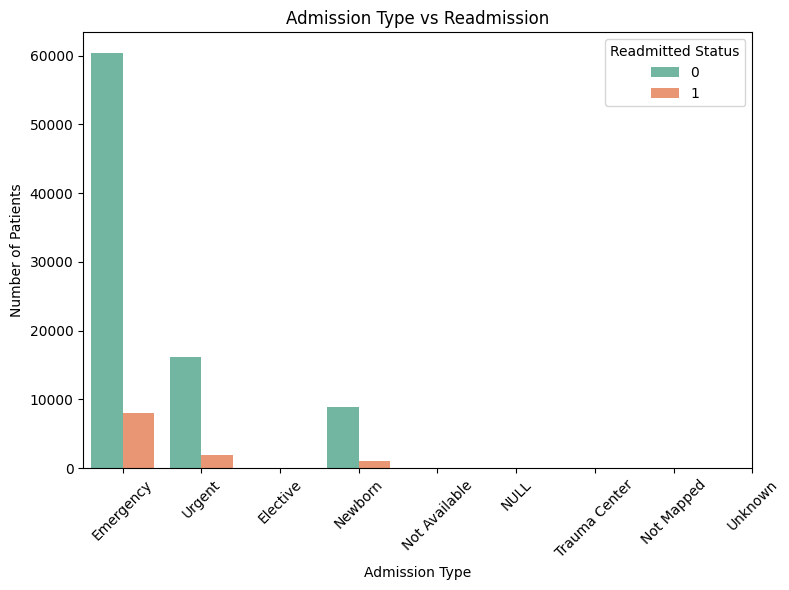

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='admission_type_id', hue='readmitted', data=df, palette='Set2')
plt.title('Admission Type vs Readmission')
plt.xlabel('Admission Type')
plt.ylabel('Number of Patients')
plt.legend(title='Readmitted Status')
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8], labels=[
    'Emergency', 'Urgent', 'Elective', 'Newborn',
    'Not Available', 'NULL', 'Trauma Center',
    'Not Mapped', 'Unknown'], rotation=45)
plt.tight_layout()
plt.show()


#### Number of medication used and Readmission

<ipython-input-40-a375a058d54b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='readmitted', y='num_medications', data=df, palette='muted')


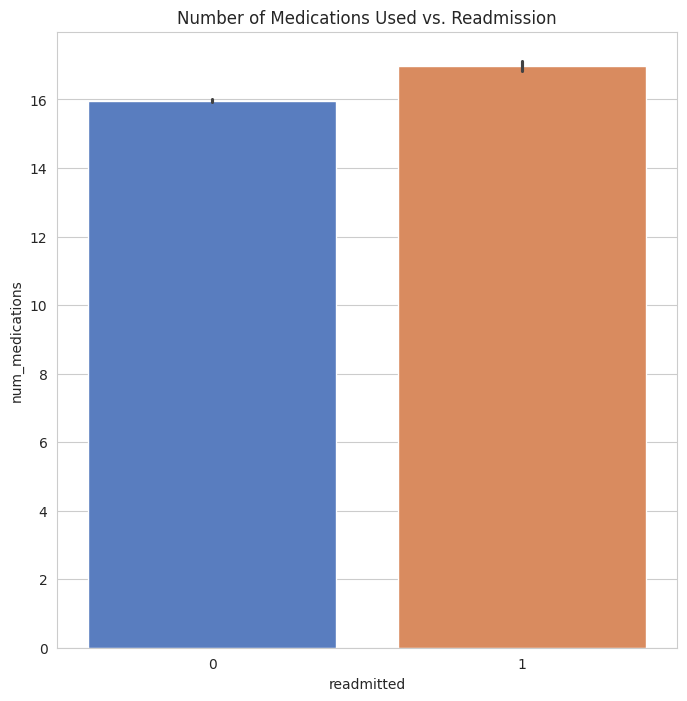

In [ ]:
# Set the figure size
plt.figure(figsize=(8, 8))

# Create the bar plot with a custom palette
sns.barplot(x='readmitted', y='num_medications', data=df, palette='muted')
plt.title('Number of Medications Used vs. Readmission')
plt.show()

#### Gender and Readmission
* Male = 1
* Female = 0

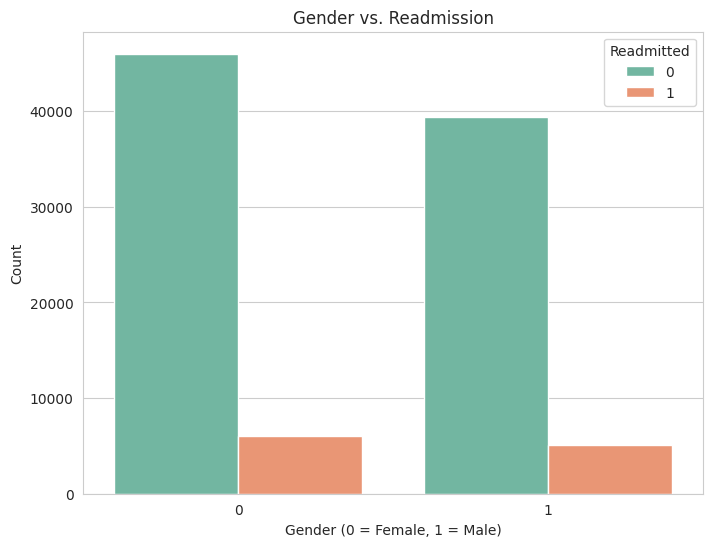

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='gender', hue='readmitted', data=df, palette='Set2')
plt.title('Gender vs. Readmission')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.legend(title='Readmitted')
plt.show()



#### Change of Medication and Readmission
* Change = 1
* No Change = 0

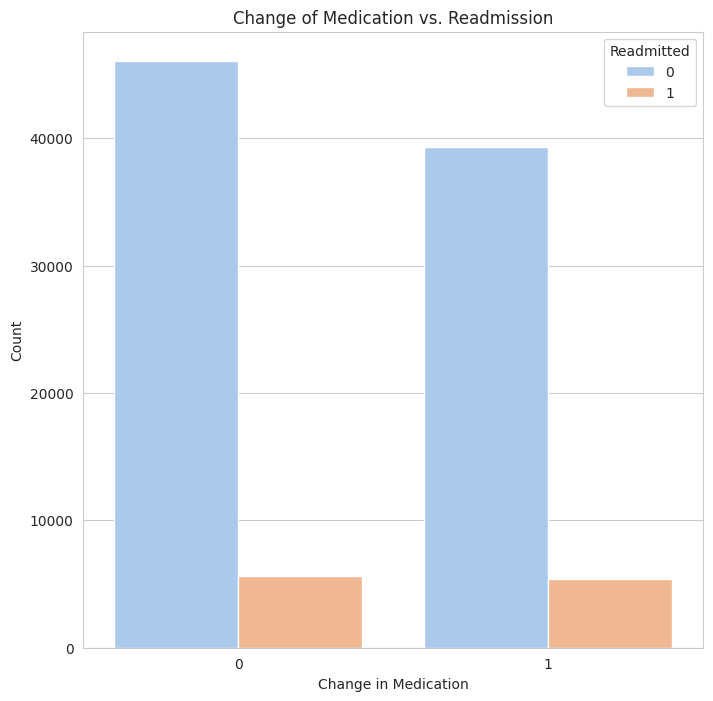

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x='change', hue='readmitted', data=df, palette='pastel')
plt.title('Change of Medication vs. Readmission')
plt.xlabel('Change in Medication')
plt.ylabel('Count')
plt.legend(title='Readmitted')
plt.show()


#### Diabetes Medication prescribed and Readmission
* Diabetes Medication - medications Nominal Indicates if there was any diabetic medication prescribed.
* Values: “yes” : 1 “no” : 0

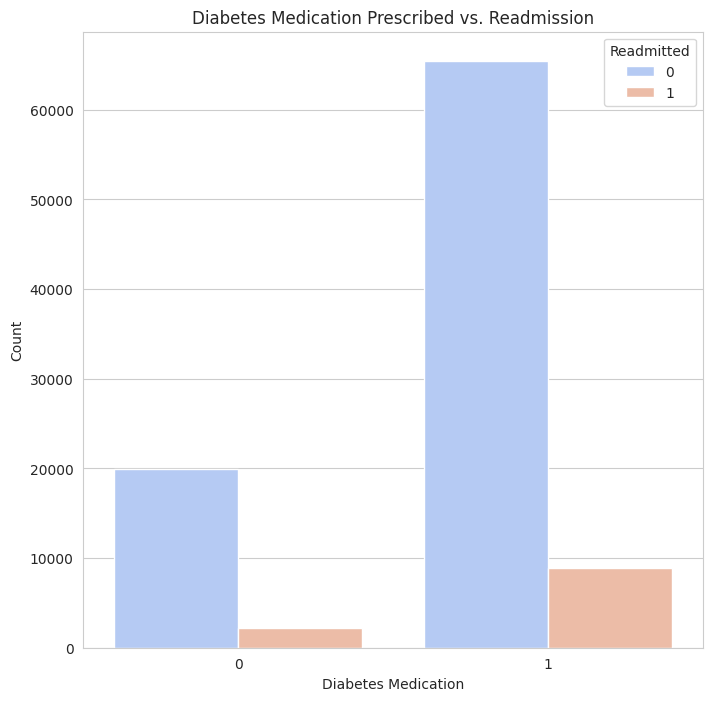

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x='diabetesMed', hue='readmitted', data=df, palette='coolwarm')
plt.title('Diabetes Medication Prescribed vs. Readmission')
plt.xlabel('Diabetes Medication')
plt.ylabel('Count')
plt.legend(title='Readmitted')
plt.show()


#### Service Utilization and Readmission


<ipython-input-44-24add0681f67>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='readmitted', y='service_utilization', data=df, palette='Blues')


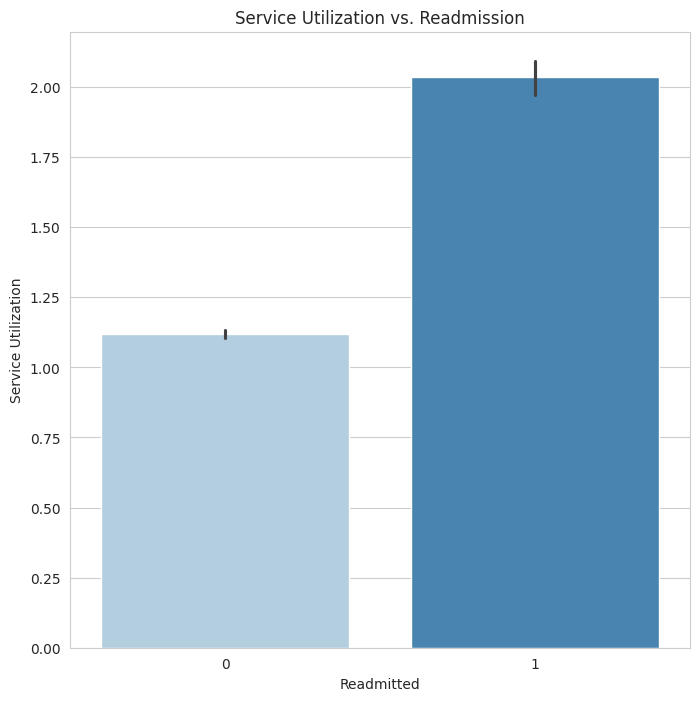

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x='readmitted', y='service_utilization', data=df, palette='Blues')
plt.title('Service Utilization vs. Readmission')
plt.xlabel('Readmitted')
plt.ylabel('Service Utilization')
plt.show()

#### Glucose serum test result and Readmission
*Glucose Serum test* - A blood glucose test is used to find out if your blood sugar levels are in the healthy range. It is often used to help diagnose and monitor diabetes.

* '>200' : 1 = indicates diabetes
* '>300' : 1 = Indicates diabetes
* 'Norm' : 0 = Normal
* 'None' : -99 = test was not taken

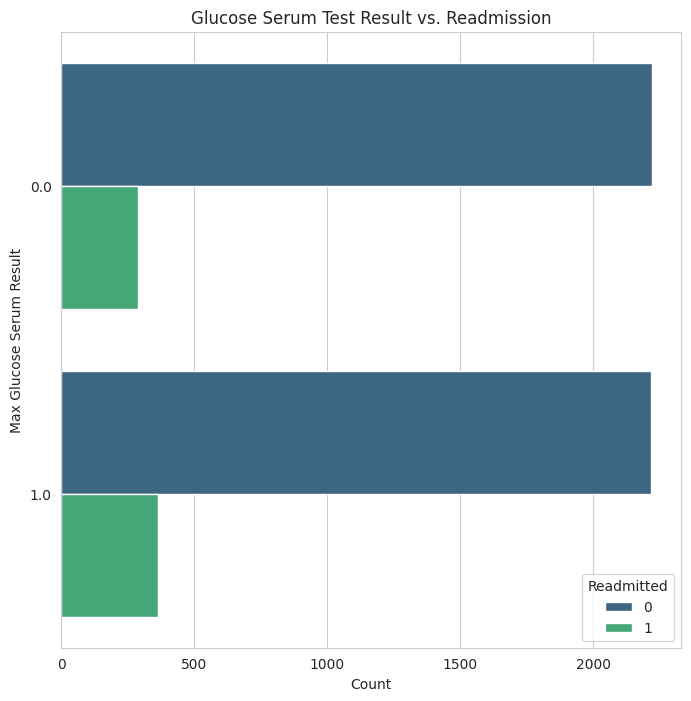

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(y='max_glu_serum', hue='readmitted', data=df, palette='viridis')
plt.title('Glucose Serum Test Result vs. Readmission')
plt.xlabel('Count')
plt.ylabel('Max Glucose Serum Result')
plt.legend(title='Readmitted')
plt.show()


A1C result and Readmission
*A1C test* - The A1C test is a blood test that provides information about your average levels of blood glucose, also called blood sugar, over the past 3 months.
*  '>7'   :  1   
*  '>8'   :  1   
*    Norm :  0  = Normal
*    None : -99 = Test was not taken

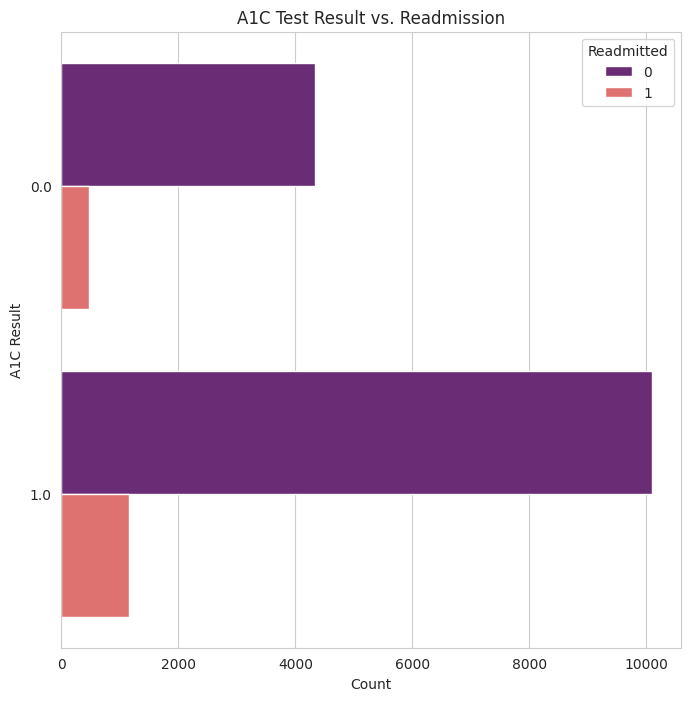

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(y='A1Cresult', hue='readmitted', data=df, palette='magma')
plt.title('A1C Test Result vs. Readmission')
plt.xlabel('Count')
plt.ylabel('A1C Result')
plt.legend(title='Readmitted')
plt.show()


#### Number of lab procedure and Readmission

<ipython-input-47-217a4e5fe706>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'num_lab_procedures'] , color='b',shade=True,label='Not readmitted')
<ipython-input-47-217a4e5fe706>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'num_lab_procedures'] , color='r',shade=True, label='readmitted')


Text(0.5, 1.0, 'Number of lab procedure VS. Readmission')

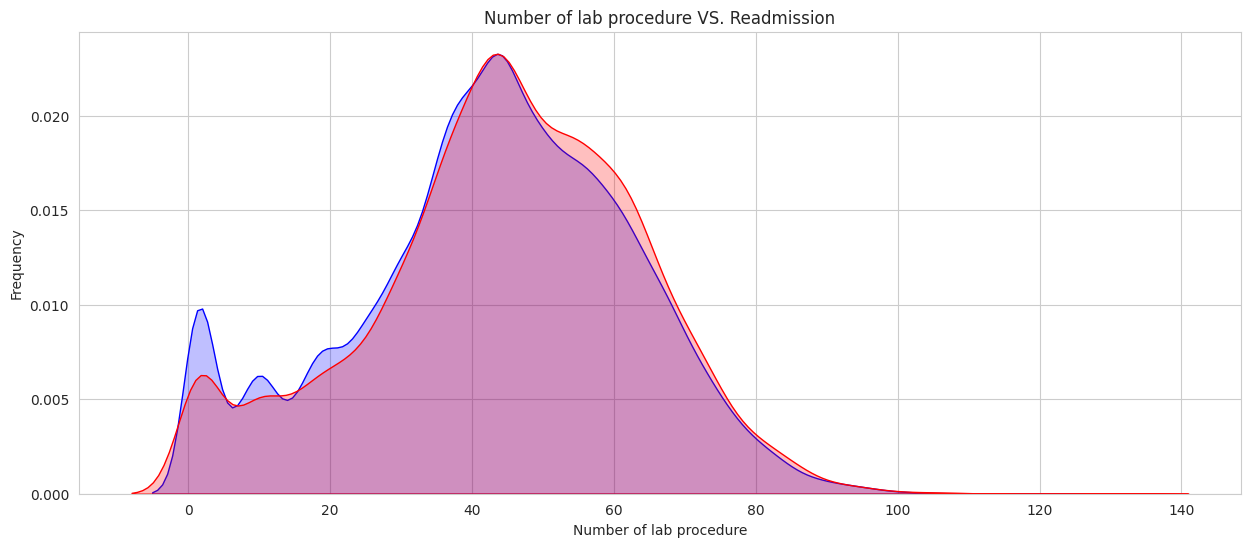

In [ ]:
fig = plt.figure(figsize=(15,6),)
ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'num_lab_procedures'] , color='b',shade=True,label='Not readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'num_lab_procedures'] , color='r',shade=True, label='readmitted')
ax.set(xlabel='Number of lab procedure', ylabel='Frequency')
plt.title('Number of lab procedure VS. Readmission')

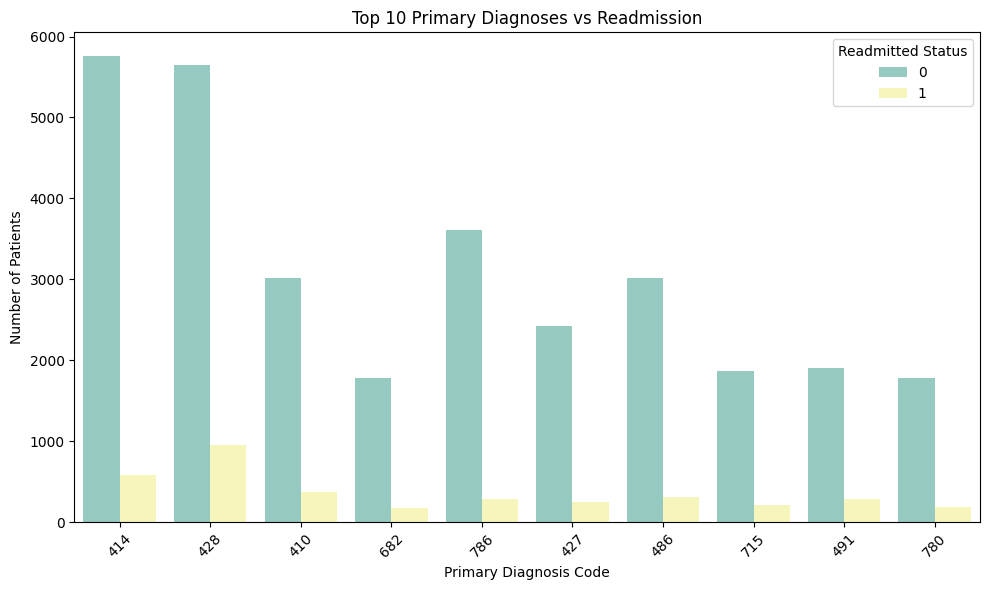

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get top 10 frequent diagnosis codes
top_10_diag = df['diag_1'].value_counts().nlargest(10).index

# Filter the dataframe to include only these top diagnoses
df_top_diag = df[df['diag_1'].isin(top_10_diag)]

# Create a grouped barplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_diag, x='diag_1', hue='readmitted', palette='Set3')
plt.title('Top 10 Primary Diagnoses vs Readmission')
plt.xlabel('Primary Diagnosis Code')
plt.ylabel('Number of Patients')
plt.legend(title='Readmitted Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


###  Pre-Modeling Data Preprocessing

In this step, we transform the `age` feature from a categorical to a continuous variable. The original age data is provided in intervals (e.g., `20-30`, `30-40`, etc.). To simplify modeling and interpretation, we approximate each age interval by its midpoint (e.g., `20-30` becomes `25`). This approach retains the ordinal nature of the data while avoiding the complexity of one-hot encoding, which can complicate model interpretation and increase dimensionality.


In [ ]:
df['age'] = df['age'].astype('int64')
print(df.age.value_counts())
# Convert age categories to mid-point values
age_dict = {1:5, 2:15, 3:25, 4:35, 5:45, 6:55, 7:65, 8:75, 9:85, 10:95}
df['age'] = df.age.map(age_dict)
print(df.age.value_counts())

age
8     24815
7     21521
6     16546
9     16223
5      9208
4      3538
10     2594
3      1471
2       466
1        64
Name: count, dtype: int64
age
75    24815
65    21521
55    16546
85    16223
45     9208
35     3538
95     2594
25     1471
15      466
5        64
Name: count, dtype: int64


In [ ]:
# Convert data type of nominal features in dataframe to 'object' type
i = ['encounter_id', 'patient_nbr', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',\
          'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', \
          'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', \
          'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', \
          'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', \
          'age', 'A1Cresult', 'max_glu_serum', 'level1_diag1', 'level1_diag2', 'level1_diag3', 'level2_diag1', 'level2_diag2', 'level2_diag3']
# Removed the duplicate 'A1Cresult' from the list 'i'

df[i] = df[i].astype('object')

In [ ]:
df.dtypes

,0
encounter_id,object
patient_nbr,object
race,object
gender,object
age,object
admission_type_id,object
discharge_disposition_id,object
admission_source_id,object
time_in_hospital,int64
num_lab_procedures,int64


###Number of Medications Used
The total number of medications prescribed during a patient's hospital encounter can serve as an indicator of the severity of their condition or the intensity of care provided. To capture this, we introduced a new feature that counts the number of distinct medications administered during the encounter. This feature aims to provide additional insight into the patient's treatment complexity and its potential relationship with readmission rates.

In [ ]:
df['nummed'] = 0

for col in keys:
    df['nummed'] = df['nummed'] + df[col]
df['nummed'].value_counts()

,count
nummed,
1,44589
0,22156
2,20901
3,7448
4,1290
5,57
6,5


In [ ]:
# Get list of only numeric features
num_col = list(set(list(df._get_numeric_data().columns))- {'readmitted'})
num_col

['time_in_hospital',
 'num_medications',
 'num_procedures',
 'number_outpatient',
 'number_diagnoses',
 'num_lab_procedures',
 'number_emergency',
 'number_inpatient',
 'service_utilization',
 'numchange']

In [ ]:
# Removing skewnewss and kurtosis using log transformation if it is above a threshold value -  2

statdataframe = pd.DataFrame()
statdataframe['numeric_column'] = num_col
skew_before = []
skew_after = []

kurt_before = []
kurt_after = []

standard_deviation_before = []
standard_deviation_after = []

log_transform_needed = []

log_type = []

for i in num_col:
    skewval = df[i].skew()
    skew_before.append(skewval)

    kurtval = df[i].kurtosis()
    kurt_before.append(kurtval)

    sdval = df[i].std()
    standard_deviation_before.append(sdval)

    if (abs(skewval) >2) & (abs(kurtval) >2):
        log_transform_needed.append('Yes')

        if len(df[df[i] == 0])/len(df) <=0.02:
            log_type.append('log')
            skewvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).skew()
            skew_after.append(skewvalnew)

            kurtvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)

            sdvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).std()
            standard_deviation_after.append(sdvalnew)

        else:
            log_type.append('log1p')
            skewvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).skew()
            skew_after.append(skewvalnew)

            kurtvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)

            sdvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).std()
            standard_deviation_after.append(sdvalnew)

    else:
        log_type.append('NA')
        log_transform_needed.append('No')

        skew_after.append(skewval)
        kurt_after.append(kurtval)
        standard_deviation_after.append(sdval)

statdataframe['skew_before'] = skew_before
statdataframe['kurtosis_before'] = kurt_before
statdataframe['standard_deviation_before'] = standard_deviation_before
statdataframe['log_transform_needed'] = log_transform_needed
statdataframe['log_type'] = log_type
statdataframe['skew_after'] = skew_after
statdataframe['kurtosis_after'] = kurt_after
statdataframe['standard_deviation_after'] = standard_deviation_after

In [ ]:
statdataframe

,numeric_column,skew_before,kurtosis_before,standard_deviation_before,log_transform_needed,log_type,skew_after,kurtosis_after,standard_deviation_after
0,time_in_hospital,1.127510,0.839050,2.982330,No,NA,1.127510,0.839050,2.982330
1,num_medications,1.339187,3.549325,8.072516,No,NA,1.339187,3.549325,8.072516
2,num_procedures,1.313236,0.856100,1.703183,No,NA,1.313236,0.856100,1.703183
3,number_outpatient,8.767489,146.244961,1.280061,Yes,log1p,2.708627,7.648535,0.432949
4,number_diagnoses,-0.807741,-0.372558,1.836659,No,NA,-0.807741,-0.372558,1.836659
5,num_lab_procedures,-0.240626,-0.253275,19.656782,No,NA,-0.240626,-0.253275,19.656782
6,number_emergency,22.695921,1165.140400,0.948089,Yes,log1p,3.614471,15.854105,0.318742
7,number_inpatient,3.566269,20.044813,1.269975,Yes,log1p,1.425127,1.319186,0.513389
8,service_utilization,5.312374,67.194018,2.315789,Yes,log1p,1.097244,0.497241,0.665656
9,numchange,1.426548,1.451898,0.488614,No,NA,1.426548,1.451898,0.488614


In [ ]:
# Performing the log transformation for the columns determined to be needing it above.

for i in range(len(statdataframe)):
    if statdataframe['log_transform_needed'][i] == 'Yes':
        colname = str(statdataframe['numeric_column'][i])

        if statdataframe['log_type'][i] == 'log':
            df = df[df[colname] > 0]
            df[colname + "_log"] = np.log(df[colname])

        elif statdataframe['log_type'][i] == 'log1p':
            df = df[df[colname] >= 0]
            df[colname + "_log1p"] = np.log1p(df[colname])

In [ ]:
df = df.drop(['number_outpatient', 'number_inpatient', 'number_emergency','service_utilization'], axis = 1)

In [ ]:
df.shape

(96446, 54)

In [ ]:
# Now get list of only numeric features
numerics = list(set(list(df._get_numeric_data().columns))- {'readmitted'})
numerics

['time_in_hospital',
 'number_inpatient_log1p',
 'num_medications',
 'number_emergency_log1p',
 'num_procedures',
 'number_diagnoses',
 'num_lab_procedures',
 'numchange',
 'number_outpatient_log1p',
 'service_utilization_log1p']

In [ ]:
# Convert data type of nominal features in dataframe to 'object' type for aggregating
i = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', \
          'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', \
          'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', \
          'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone','A1Cresult']
# Replace NaN values with a suitable integer (e.g., -1) before converting to int64
df[i] = df[i].fillna(-1).astype('int64')


df.dtypes

<ipython-input-59-a7bdd11a7c9f>:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[i] = df[i].fillna(-1).astype('int64')


,0
encounter_id,object
patient_nbr,object
race,object
gender,object
age,object
admission_type_id,object
discharge_disposition_id,object
admission_source_id,object
time_in_hospital,int64
num_lab_procedures,int64


In [ ]:
dfcopy = df.copy(deep = True)

In [ ]:
#Recoding Readmission Values
df['readmitted'] = df['readmitted'].apply(lambda x: 0 if x == 2 else x)

###Dropping Detailed Diagnosis Columns
We remove the following columns: diag_1, diag_2, diag_3, level2_diag1, level1_diag2, level2_diag2, level1_diag3, and level2_diag3. These columns contain granular disease information or secondary and tertiary diagnoses, which may not be necessary for our analysis. Dropping them helps simplify the dataset and focus on primary diagnosis information.

In [ ]:

df.drop(['diag_1', 'diag_2', 'diag_3', 'level2_diag1', 'level1_diag2', 'level2_diag2', 'level1_diag3',
         'level2_diag3'], axis=1, inplace=True)

In [ ]:
# Define pairs of features for interaction terms to capture combined effects

interactionterms = [('num_medications','time_in_hospital'),
('num_medications','num_procedures'),
('time_in_hospital','num_lab_procedures'),
('num_medications','num_lab_procedures'),
('num_medications','number_diagnoses'),
('age','number_diagnoses'),
('change','num_medications'),
('number_diagnoses','time_in_hospital'),
('num_medications','numchange')]

In [ ]:
#For each pair, we create a new feature by multiplying the two original features:
for inter in interactionterms:
      name = inter[0] + '|' + inter[1]
      df[name] = df[inter[0]] * df[inter[1]]

In [ ]:
df[['num_medications','time_in_hospital', 'num_medications|time_in_hospital']].head()

,num_medications,time_in_hospital,num_medications|time_in_hospital
0,18,3,54
1,13,2,26
2,16,2,32
3,8,1,8
4,16,3,48


In [ ]:
# Feature Scaling
datf = pd.DataFrame()
datf['features'] = numerics
datf['std_dev'] = datf['features'].apply(lambda x: df[x].std())
datf['mean'] = datf['features'].apply(lambda x: df[x].mean())

In [ ]:
# Dropping multiple encounters while keeping first encounter of these patients
df2 = df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
df2.shape

(67580, 55)

In [ ]:
# Standardize function
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

In [ ]:
# Standardization
df2[numerics] = standardize(df2[numerics])
import scipy as sp
#Outlier Removal Using Z-Score
df2 = df2[(np.abs(sp.stats.zscore(df2[numerics])) < 3).all(axis=1)]

In [ ]:
from matplotlib.colors import ListedColormap
import seaborn as sns
import pandas as pd
import numpy as np

my_cmap = ListedColormap(sns.light_palette((250, 100, 50), input="husl", n_colors=50).as_hex())
# Select only numerical features for correlation calculation
numerical_features = df2.select_dtypes(include=np.number).columns
table = df2[numerical_features].drop(['patient_nbr', 'encounter_id'], axis=1, errors='ignore').corr(method='pearson')
table.style.background_gradient(cmap=my_cmap, axis = 0)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/style.py:3807: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/style.py:3808: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,readmitted,numchange,number_outpatient_log1p,number_emergency_log1p,number_inpatient_log1p,service_utilization_log1p,num_medications|time_in_hospital,num_medications|num_procedures,time_in_hospital|num_lab_procedures,num_medications|num_lab_procedures,num_medications|number_diagnoses,number_diagnoses|time_in_hospital,num_medications|numchange
time_in_hospital,1.000000,0.316848,0.121927,0.422529,0.224193,0.072480,-0.016363,0.027931,0.003363,0.001780,0.004176,nan,0.009805,0.026444,0.003547,-0.004776,-0.002053,-0.001044,0.001733,0.007098,-0.006489,0.095656,0.000481,0.003410,nan,nan,0.003519,0.055717,0.138906,-0.027423,nan,nan,-0.027423,0.860687,0.240619,0.847024,0.489625,0.439539,0.933669,0.218607
num_lab_procedures,0.316848,1.000000,-0.006403,0.212490,0.124381,0.273986,-0.048411,0.003632,-0.004928,-0.004390,-0.013855,nan,0.014803,0.006234,0.001509,-0.018788,-0.012379,-0.008596,-0.001844,0.005918,-0.000091,0.103282,-0.016290,-0.003880,nan,nan,-0.004273,0.023614,0.110191,-0.047726,nan,nan,-0.047726,0.321860,0.087991,0.682779,0.737897,0.239378,0.313611,0.146956
num_procedures,0.121927,-0.006403,1.000000,0.311352,0.050673,-0.033448,-0.063771,0.004795,-0.003593,0.004988,0.007596,nan,0.003776,0.004096,0.001418,0.015423,0.007280,0.000838,0.002933,-0.006250,0.001436,-0.006798,-0.006800,-0.003648,nan,nan,-0.001007,-0.000009,-0.020171,-0.010876,nan,nan,-0.010876,0.235427,0.886167,0.108917,0.211596,0.265811,0.129523,0.056217
num_medications,0.422529,0.212490,0.311352,1.000000,0.246530,0.011189,0.077854,0.024770,0.031675,0.001895,0.043119,nan,0.056143,0.044637,0.008426,0.076314,0.061122,0.015593,0.006460,0.005298,-0.000519,0.191653,0.010380,0.005535,nan,nan,0.003495,0.037341,0.188406,0.032419,nan,nan,0.032419,0.742561,0.568917,0.414440,0.755473,0.890990,0.442394,0.375414
number_diagnoses,0.224193,0.124381,0.050673,0.246530,1.000000,-0.010809,-0.073655,0.030994,0.018156,-0.013487,0.010453,nan,-0.015471,-0.027543,-0.000325,0.001430,-0.006650,0.004680,0.001327,0.005967,-0.011268,0.091870,0.001203,0.002343,nan,nan,-0.007460,0.037361,0.066638,0.045926,nan,nan,0.045926,0.249036,0.103248,0.212675,0.246435,0.612088,0.497507,0.119930
A1Cresult,0.072480,0.273986,-0.033448,0.011189,-0.010809,1.000000,0.048814,0.019684,0.001599,-0.004408,0.021790,nan,0.015392,0.011597,-0.000154,-0.000487,0.007908,-0.001019,0.001067,-0.003546,-0.003381,0.112081,-0.004869,0.004432,nan,nan,-0.002047,-0.005851,0.125346,-0.033918,nan,nan,-0.033918,0.059988,-0.003406,0.181174,0.178107,0.018024,0.054490,0.110255
metformin,-0.016363,-0.048411,-0.063771,0.077854,-0.073655,0.048814,1.000000,0.003756,0.019257,-0.010825,0.040953,nan,0.077283,0.133703,-0.008262,0.049160,0.090703,0.010229,0.009065,-0.003968,-0.002200,-0.016889,-0.026088,-0.001884,nan,nan,0.008762,-0.003604,0.026859,0.017918,nan,nan,0.017918,0.014421,-0.019657,-0.038077,0.006745,0.025100,-0.039524,0.030993
repaglinide,0.027931,0.003632,0.004795,0.024770,0.030994,0.019684,0.003756,1.000000,-0.000220,-0.003628,-0.006150,nan,-0.017910,-0.026449,-0.001779,0.017548,0.019982,0.024694,0.023195,-0.000855,-0.002418,0.013050,-0.005040,-0.001306,nan,nan,-0.000493,0.011878,0.033898,0.001497,nan,nan,0.001497,0.030591,0.012176,0.021595,0.020881,0.034999,0.037383,0.032298
nateglinide,0.003363,-0.004928,-0.003593,0.031675,0.018156,0.001599,0.019257,-0.000220,1.000000,-0.002739,0.002913,nan,-0.015778,-0.022674,-0.001343,0.029898,0.015841,0.005833,-0.001236,-0.000645,-0.001825,0.003509,-0.001353,-0.000986,nan,nan,-0.000373,-0.002916,0.004676,0.008847,nan,nan,0.008847,0.014348,0.004154,-0.001833,0.015624,0.032627,0.009263,0.007565
chlorpropamide,0.0017

In [ ]:
# Convert 'level1_diag1' to object type to ensure it's treated as categorical
df2['level1_diag1'] = df2['level1_diag1'].astype('object')

# Perform one-hot encoding on specified categorical columns
# 'drop_first=True' avoids multicollinearity by dropping the first category in each column

df_pd = pd.get_dummies(df2, columns=['gender', 'admission_type_id', 'discharge_disposition_id',
                                      'admission_source_id', 'max_glu_serum', 'A1Cresult', 'level1_diag1'], drop_first = True)
# Manually one-hot encode the 'race' column
just_dummies = pd.get_dummies(df_pd['race'])

# Concatenate the new dummy variables to the main DataFrame
df_pd = pd.concat([df_pd, just_dummies], axis=1)

# Drop the original 'race' column as it's now encoded
df_pd.drop(['race'], inplace=True, axis=1)

In [ ]:
#Non-Numeric Columns
non_num_cols = ['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
                'max_glu_serum', 'A1Cresult', 'level1_diag1' ]

In [ ]:
#Numeric Columns
num_cols = list(set(list(df._get_numeric_data().columns))- {'readmitted', 'change'})
num_cols

['time_in_hospital',
 'repaglinide',
 'num_procedures',
 'glipizide',
 'number_diagnoses',
 'rosiglitazone',
 'num_medications|num_lab_procedures',
 'metformin-pioglitazone',
 'num_medications|numchange',
 'glyburide',
 'number_emergency_log1p',
 'time_in_hospital|num_lab_procedures',
 'number_diagnoses|time_in_hospital',
 'metformin-rosiglitazone',
 'A1Cresult',
 'number_outpatient_log1p',
 'num_medications|num_procedures',
 'acetohexamide',
 'num_medications|time_in_hospital',
 'num_medications',
 'glimepiride',
 'acarbose',
 'troglitazone',
 'num_lab_procedures',
 'metformin',
 'num_medications|number_diagnoses',
 'service_utilization_log1p',
 'number_inpatient_log1p',
 'nateglinide',
 'pioglitazone',
 'glyburide-metformin',
 'glimepiride-pioglitazone',
 'chlorpropamide',
 'miglitol',
 'insulin',
 'glipizide-metformin',
 'numchange',
 'tolbutamide',
 'tolazamide']

In [ ]:
# Identify and Collect Non-Numeric Columns in the DataFrame
new_non_num_cols = []
for i in non_num_cols:

    for j in df_pd.columns:
        if i in j:
            new_non_num_cols.append(j)

In [ ]:
new_non_num_cols

['gender_1',
 'admission_type_id_3',
 'admission_type_id_4',
 'admission_type_id_5',
 'discharge_disposition_id_2',
 'discharge_disposition_id_7',
 'discharge_disposition_id_10',
 'discharge_disposition_id_18',
 'discharge_disposition_id_19',
 'discharge_disposition_id_20',
 'discharge_disposition_id_27',
 'discharge_disposition_id_28',
 'admission_source_id_4',
 'admission_source_id_7',
 'admission_source_id_8',
 'admission_source_id_9',
 'admission_source_id_11',
 'max_glu_serum_1.0',
 'A1Cresult_0',
 'A1Cresult_1',
 'level1_diag1_1.0',
 'level1_diag1_2.0',
 'level1_diag1_3.0',
 'level1_diag1_4.0',
 'level1_diag1_5.0',
 'level1_diag1_6.0',
 'level1_diag1_7.0',
 'level1_diag1_8.0']

In [ ]:
# Extract Column Names Containing the '|' Character
l = []
for feature in list(df_pd.columns):
    if '|' in feature:
            l.append(feature)
            l

In [ ]:
df_pd.head().T

,0,2,3,4,5
encounter_id,149190,500364,16680,35754,55842
patient_nbr,55629189,82442376,42519267,82637451,84259809
age,15,35,45,55,65
time_in_hospital,-0.40723,-0.770523,-1.133815,-0.40723,-0.043938
num_lab_procedures,0.851788,0.091569,0.446337,-0.567288,1.409282
...,...,...,...,...,...
AfricanAmerican,False,False,False,False,False
Asian,False,False,False,False,False
Caucasian,True,True,True,True,True
Hispanic,False,False,False,False,False


## Modeling

In [ ]:
feature_set = ['age', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient_log1p',
                 'number_emergency_log1p', 'number_inpatient_log1p', 'number_diagnoses', 'metformin',
                 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide',
                 'pioglitazone', 'rosiglitazone', 'acarbose', 'tolazamide', 'insulin', 'glyburide-metformin',
                 'AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other', 'gender_1',
                 'admission_type_id_3', 'admission_type_id_5', 'discharge_disposition_id_2', 'discharge_disposition_id_7',
                 'discharge_disposition_id_10', 'discharge_disposition_id_18', 'admission_source_id_4',
                 'admission_source_id_7', 'admission_source_id_9', 'A1Cresult_0',
                 'A1Cresult_1', 'num_medications|time_in_hospital', 'num_medications|num_procedures',
                 'time_in_hospital|num_lab_procedures', 'num_medications|num_lab_procedures', 'num_medications']

In [ ]:
X = df_pd[feature_set]
y = df_pd['readmitted']

### 1. Logistic Regression

In [ ]:
df_pd['readmitted'].value_counts()

,count
readmitted,
0,45847
1,3969


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Setting the solver to 'liblinear' or 'saga' to support 'l1' penalty
logit = LogisticRegression(fit_intercept=True, penalty='l1', solver='liblinear')


logit.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [ ]:
logit_pred = logit.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(logit_pred, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,1137,1,1138
1,126,0,126
All,1263,1,1264


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, logit_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, logit_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, logit_pred)))

Accuracy is 0.92
Precision is 0.00
Recall is 0.00


In our dataset, the target variable exhibits class imbalance, meaning one class significantly outnumbers the other. This imbalance can lead to biased models that perform poorly on the minority class.​

To address this, we employ the Synthetic Minority Over-sampling Technique (SMOTE). SMOTE generates synthetic examples of the minority class by interpolating between existing minority instances. This approach helps balance the class distribution without simply duplicating existing records, thereby improving the model's ability to learn from the minority class.


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print('Original dataset shape {}'.format(Counter(y_train)))
sm = SMOTE(random_state=20)

train_input_new, train_output_new = sm.fit_resample(X_train, y_train)

print('New dataset shape {}'.format(Counter(train_output_new)))

Original dataset shape Counter({0: 36720, 1: 3132})
New dataset shape Counter({0: 36720, 1: 36720})


In [ ]:
train_input_new = pd.DataFrame(train_input_new, columns = list(X.columns))
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)
logit = LogisticRegression(fit_intercept=True, penalty='l1', solver='liblinear')
logit.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression(penalty='l1', solver='liblinear')

In [ ]:
train_input_new = pd.DataFrame(train_input_new, columns = list(X.columns))
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)
logit = LogisticRegression(fit_intercept=True, penalty='l1', solver='liblinear')
logit.fit(X_train_smote, y_train_smote)
logit_pred = logit.predict(X_test_smote) #Predict using the smote test data

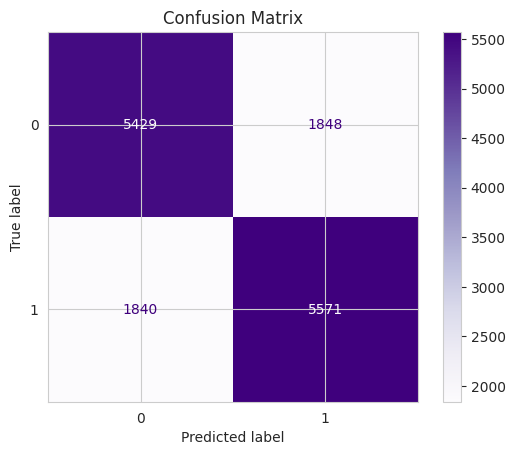

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Predict using the smote test data (X_test_smote)
logit_pred = logit.predict(X_test_smote)

# Plot the confusion matrix using y_test_smote (the SMOTE test data labels)
disp = ConfusionMatrixDisplay.from_predictions(y_test_smote, logit_pred, cmap='Purples')
disp.ax_.set_title('Confusion Matrix')
plt.show()

NameError: name 'dt' is not defined

In [ ]:
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, logit_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, logit_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, logit_pred)))

accuracy_logit = accuracy_score(y_test, logit_pred)
precision_logit = precision_score(y_test, logit_pred)
recall_logit = recall_score(y_test, logit_pred)

Accuracy is 0.75
Precision is 0.75
Recall is 0.75


### 2. Decision Tree

In [ ]:
feature_set_no_int = ['age', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient_log1p',
                 'number_emergency_log1p', 'number_inpatient_log1p', 'number_diagnoses', 'metformin',
                 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide',
                 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose',
                 'tolazamide', 'insulin', 'glyburide-metformin',
                 'AfricanAmerican', 'Asian', 'Caucasian',
                 'Hispanic', 'Other', 'gender_1',
                 'admission_type_id_3', 'admission_type_id_5',
                 'discharge_disposition_id_2', 'discharge_disposition_id_7',
                 'discharge_disposition_id_10', 'discharge_disposition_id_18',
                 'admission_source_id_4', 'admission_source_id_7',
                 'admission_source_id_9', 'A1Cresult_0', 'A1Cresult_1',
                 'level1_diag1_1.0',
                 'level1_diag1_2.0',
                 'level1_diag1_3.0',
                 'level1_diag1_4.0',
                 'level1_diag1_5.0',
                 'level1_diag1_6.0',
                 'level1_diag1_7.0',
                 'level1_diag1_8.0']

In [ ]:
X = df_pd[feature_set_no_int]
y = df_pd['readmitted']
df_pd['readmitted'].value_counts()

,count
readmitted,
0,45847
1,3969


In [ ]:
!pip install -U imbalanced-learn

In [ ]:
print('Original dataset shape {}'.format(Counter(y)))
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=20)

train_input_new, train_output_new = smt.fit_resample(X, y)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(X.columns))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

Original dataset shape Counter({0: 45847, 1: 3969})
New dataset shape Counter({0: 45847, 1: 45847})


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=28, min_samples_split=10)

In [ ]:
dtree_pred = dtree.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(dtree_pred, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,1677,1645,3322
1,154,143,297
All,1831,1788,3619


In [ ]:
y_pred_train = dtree.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Train Accuracy:", train_accuracy)

Train Accuracy: 0.9366659858387799


In [ ]:
dt = DecisionTreeClassifier(
    max_depth=10,               # Limit the depth of the tree
    min_samples_split=10,       # Minimum samples to split a node
    min_samples_leaf=5,         # Minimum samples per leaf
    random_state=42
)

# Train the model
dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

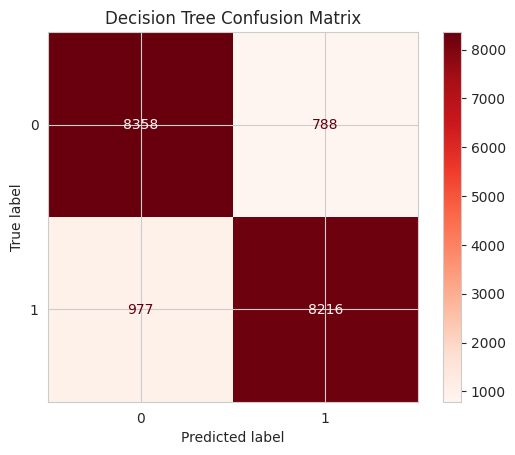

In [ ]:
# Plotting the confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test, dtree_pred, cmap='Reds')
disp.ax_.set_title('Decision Tree Confusion Matrix')
plt.show()

In [ ]:
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, dtree_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, dtree_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, dtree_pred)))

accuracy_dtree = accuracy_score(y_test, dtree_pred)
precision_dtree = precision_score(y_test, dtree_pred)
recall_dtree = recall_score(y_test, dtree_pred)

Accuracy is 0.90
Precision is 0.91
Recall is 0.89


                       Feature  Importance
26                    gender_1    0.013078
19                     insulin    0.013584
34       admission_source_id_7    0.014397
38            level1_diag1_1.0    0.014834
29  discharge_disposition_id_2    0.041130
0                          age    0.043104
2               num_procedures    0.084276
3              num_medications    0.094563
7             number_diagnoses    0.105709
1             time_in_hospital    0.403871


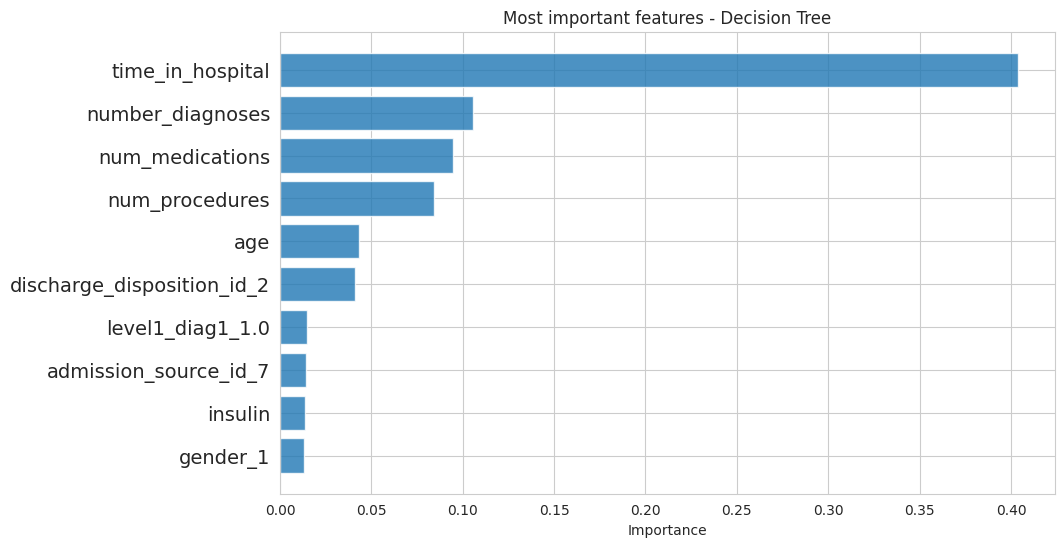

In [ ]:
# Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = dtree.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
print(most_imp_features)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Decision Tree')
plt.show()

### 3. Random Forest

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter


X = df_pd[feature_set_no_int]
y = df_pd['readmitted']

print('Original dataset shape {}'.format(Counter(y)))
smt = SMOTE(random_state=20)

train_input_new, train_output_new = smt.fit_resample(X, y)

print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(X.columns))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)


Original dataset shape Counter({0: 45847, 1: 3969})
New dataset shape Counter({0: 45847, 1: 45847})


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rm = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10)
rm.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, min_samples_split=10, n_estimators=10)

In [ ]:
rm_prd = rm.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(rm_prd, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,1706,1616,3322
1,150,147,297
All,1856,1763,3619


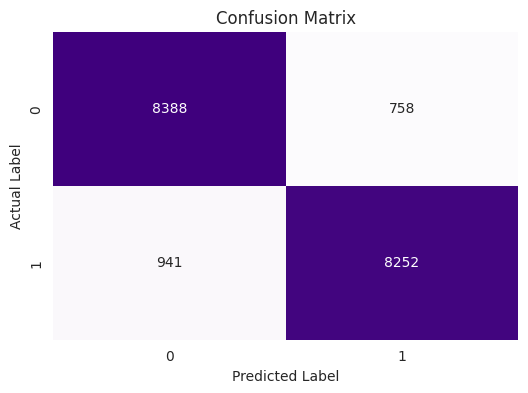

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Computing the confusion matrix
cm = confusion_matrix(y_test, rm_prd)

# Creating a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()


In [ ]:
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, rm_prd)))
print("Precision is {0:.2f}".format(precision_score(y_test, rm_prd)))
print("Recall is {0:.2f}".format(recall_score(y_test, rm_prd)))

accuracy_rm = accuracy_score(y_test, rm_prd)
precision_rm = precision_score(y_test, rm_prd)
recall_rm = recall_score(y_test, rm_prd)

Accuracy is 0.91
Precision is 0.92
Recall is 0.90


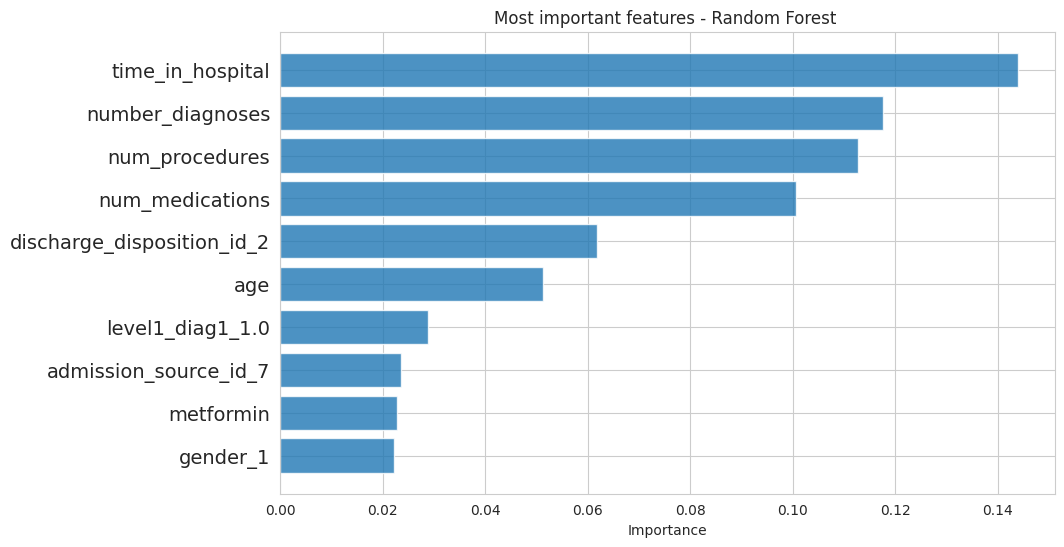

In [ ]:
# Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = rm.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest ')
plt.show()

# Model Comparision

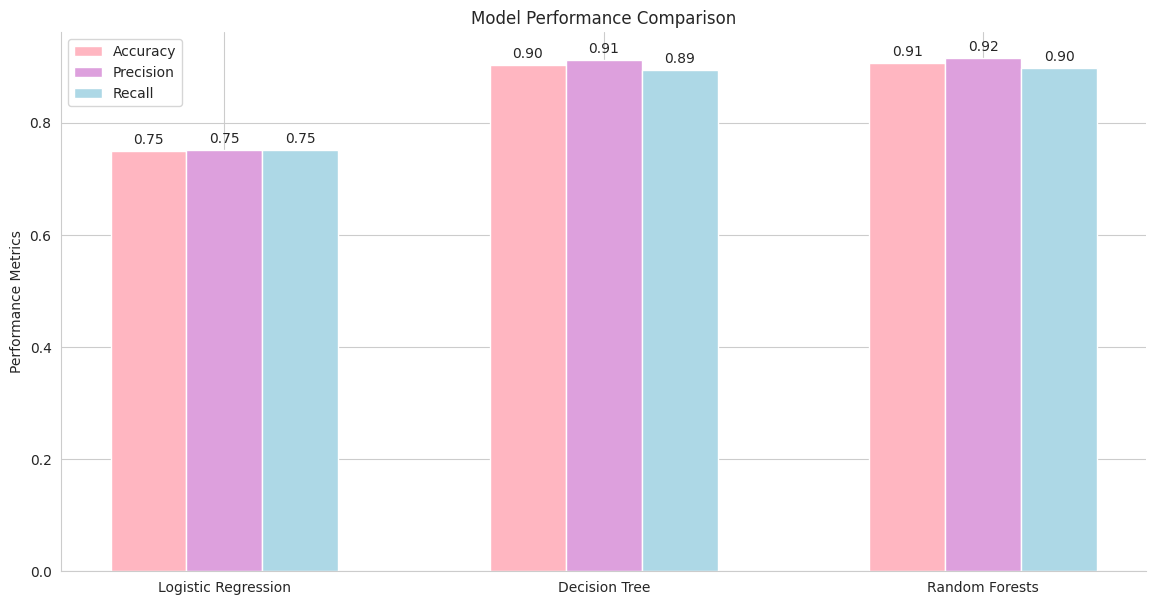

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the models and their corresponding metrics
models = ['Logistic Regression', 'Decision Tree', 'Random Forests']
model_indices = np.arange(len(models))


accuracy_values = [accuracy_logit, accuracy_dtree, accuracy_rm]
precision_values = [precision_logit, precision_dtree, precision_rm]
recall_values = [recall_logit, recall_dtree, recall_rm]


accuracy_color = '#FFB6C1'
precision_color = '#DDA0DD'
recall_color = '#ADD8E6'

bar_width = 0.2

# Create the plot
plt.figure(figsize=(14, 7))
ax = plt.subplot(111)

# Plot each metric with a slight offset to prevent overlap
bars_accuracy = ax.bar(model_indices, accuracy_values, width=bar_width, color=accuracy_color, label='Accuracy')
bars_precision = ax.bar(model_indices + bar_width, precision_values, width=bar_width, color=precision_color, label='Precision')
bars_recall = ax.bar(model_indices + 2 * bar_width, recall_values, width=bar_width, color=recall_color, label='Recall')

# Add value labels on top of each bar
ax.bar_label(bars_accuracy, fmt='%.2f', padding=3)
ax.bar_label(bars_precision, fmt='%.2f', padding=3)
ax.bar_label(bars_recall, fmt='%.2f', padding=3)

# Set the x-axis labels and positions
ax.set_xticks(model_indices + bar_width)
ax.set_xticklabels(models)

# Set the labels and title
ax.set_ylabel('Performance Metrics')
ax.set_title('Model Performance Comparison')

# Remove the top and right spines for a cleaner look
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add a legend to differentiate the metrics
ax.legend()

# Display the plot
plt.show()


In [ ]:
from sklearn.metrics import f1_score

# Example for Logistic Regression
logit_pred = logit.predict(X_test)
f1_logit = f1_score(y_test, logit_pred)

# Example for Decision Tree
dtree_pred = dtree.predict(X_test)
f1_dtree = f1_score(y_test, dtree_pred)

# Example for Random Forest
rm_pred = rm.predict(X_test)
f1_rm = f1_score(y_test, rm_pred)

print("F1 Score (Logistic Regression):", f1_logit)
print("F1 Score (Decision Tree):", f1_dtree)
print("F1 Score (Random Forest):", f1_rm)


F1 Score (Logistic Regression): 0.7513149022252191
F1 Score (Decision Tree): 0.9361228887189824
F1 Score (Random Forest): 0.9256687065942377


##ROC Curve and AUC Analysis

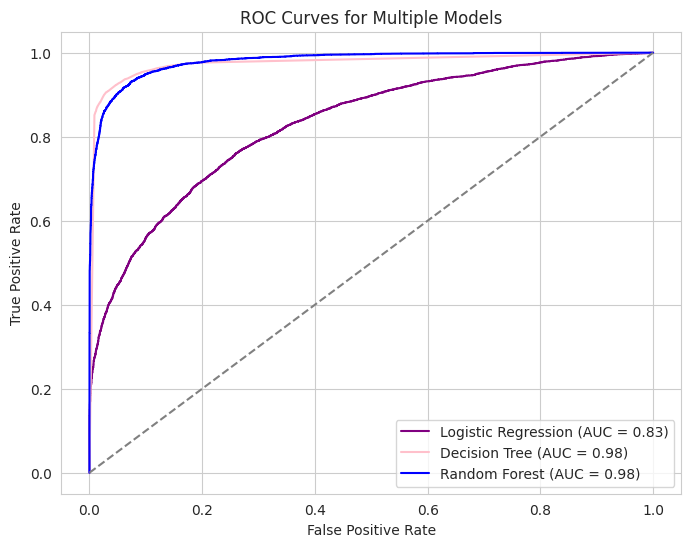

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Compute predicted probabilities for the positive class
logit_probs = logit.predict_proba(X_test)[:, 1]
dtree_probs = dtree.predict_proba(X_test)[:, 1]
rm_probs = rm.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for Logistic Regression
fpr_logit, tpr_logit, _ = roc_curve(y_test, logit_probs)
auc_logit = roc_auc_score(y_test, logit_probs)

# Compute ROC curve and AUC for Decision Tree
fpr_dtree, tpr_dtree, _ = roc_curve(y_test, dtree_probs)
auc_dtree = roc_auc_score(y_test, dtree_probs)

# Compute ROC curve and AUC for Random Forest
fpr_rm, tpr_rm, _ = roc_curve(y_test, rm_probs)
auc_rm = roc_auc_score(y_test, rm_probs)

# Plotting the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_logit, tpr_logit, label=f'Logistic Regression (AUC = {auc_logit:.2f})', color='purple')
plt.plot(fpr_dtree, tpr_dtree, label=f'Decision Tree (AUC = {auc_dtree:.2f})', color='pink')
plt.plot(fpr_rm, tpr_rm, label=f'Random Forest (AUC = {auc_rm:.2f})', color='blue')

# Plotting the diagonal line representing random chance
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiple Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


##Model Deployment Simulation: Predicting Readmission for a Hypothetical Patient

We now test our trained Random Forest model by predicting whether a hypothetical new patient would be readmitted to the hospital.

To do this:
- We manually construct a feature vector using the same features used to train the model.
- The values for each feature are based on assumed characteristics of a sample patient.
- We then use the `.predict()` and `.predict_proba()` functions to get the prediction and its associated probability.

 **Note:** The feature set must exactly match the one used during model training (including order and one-hot encoded columns). Any mismatch can lead to errors.

In [ ]:
import pandas as pd
import numpy as np

# Use  feature list
feature_set_no_int = ['age', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient_log1p',
                      'number_emergency_log1p', 'number_inpatient_log1p', 'number_diagnoses', 'metformin',
                      'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide',
                      'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose',
                      'tolazamide', 'insulin', 'glyburide-metformin',
                      'AfricanAmerican', 'Asian', 'Caucasian',
                      'Hispanic', 'Other', 'gender_1',
                      'admission_type_id_3', 'admission_type_id_5',
                      'discharge_disposition_id_2', 'discharge_disposition_id_7',
                      'discharge_disposition_id_10', 'discharge_disposition_id_18',
                      'admission_source_id_4', 'admission_source_id_7',
                      'admission_source_id_9', 'A1Cresult_0', 'A1Cresult_1',
                      'level1_diag1_1.0', 'level1_diag1_2.0', 'level1_diag1_3.0', 'level1_diag1_4.0',
                      'level1_diag1_5.0', 'level1_diag1_6.0', 'level1_diag1_7.0', 'level1_diag1_8.0']

# Step 1: Create a zero-filled DataFrame
input_df = pd.DataFrame(data=np.zeros((1, len(feature_set_no_int))), columns=feature_set_no_int)

# Step 2: Fill with hypothetical patient values
input_df.loc[0, 'age'] = 75
input_df.loc[0, 'time_in_hospital'] = 6
input_df.loc[0, 'num_procedures'] = 2
input_df.loc[0, 'num_medications'] = 4
input_df.loc[0, 'number_outpatient_log1p'] = np.log1p(0)
input_df.loc[0, 'number_emergency_log1p'] = np.log1p(1)
input_df.loc[0, 'number_inpatient_log1p'] = np.log1p(2)
input_df.loc[0, 'number_diagnoses'] = 4

# Example drug usage (1 = used, 0 = not used)
input_df.loc[0, 'insulin'] = 1
input_df.loc[0, 'metformin'] = 1
input_df.loc[0, 'glipizide'] = 1

# Race (only one = 1)
input_df.loc[0, 'Caucasian'] = 1

# Gender (1 = male)
input_df.loc[0, 'gender_1'] = 1

# Admission type (e.g., emergency or urgent)
input_df.loc[0, 'admission_type_id_3'] = 1

# Discharge disposition
input_df.loc[0, 'discharge_disposition_id_2'] = 1

# Admission source
input_df.loc[0, 'admission_source_id_7'] = 1

# A1C result
input_df.loc[0, 'A1Cresult_1'] = 1

# Diagnosis category (only one should be 1)
input_df.loc[0, 'level1_diag1_2.0'] = 1

# Step 3: Predict
prediction = rm.predict(input_df)[0]
probability = rm.predict_proba(input_df)[0][1]

# Step 4: Output
print(" Prediction for Hypothetical Patient:")
if prediction == 1:
    print(" Patient is likely to be Readmitted")
else:
    print("Patient is Not likely to be Readmitted")

print(f" Probability of readmission: {probability:.2f}")



 Prediction for Hypothetical Patient:
Patient is Not likely to be Readmitted
 Probability of readmission: 0.31
